Background & Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve their services so that customers do not renounce their credit cards

Objective

Explore and visualize the dataset.
Build a classification model to predict if the customer is going to churn or not
Optimize the model using appropriate techniques
Generate a set of insights and recommendations that will help the bank

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# importing all of the libraries that I might need

In [3]:
#!pip install xgboost
# import different models from sklearn
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, BaggingClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score

In [4]:
# conda install py-xgboost
#Needed this while working on a MacBook

In [5]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [6]:
data = pd.read_csv("BankChurners.csv") # read the file with pandas
df = data.copy() # create copy to work with
df_model = data.copy() #creating a separate due to data leakage

In [6]:
df.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0              39  ...                       1                      3   
1              44  ...                       1                      2   
2              36  ...                       1                      0   
3              34  ...                       4                      1   
4              21  ...                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000  

[5 rows x 21 columns]

Observation: 
* 21 columns , 5 rows 
* client number is useless for this analysis - ACTION: drop it - DONE


In [6]:
df.drop('CLIENTNUM', axis=1, inplace=True)
df_model.drop('CLIENTNUM', axis=1, inplace=True)

In [7]:
df.head()

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
0  Existing Customer            45      M                3     High School   
1  Existing Customer            49      F                5        Graduate   
2  Existing Customer            51      M                3        Graduate   
3  Existing Customer            40      F                4     High School   
4  Existing Customer            40      M                3      Uneducated   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0        Married     $60K - $80K          Blue              39   
1         Single  Less than $40K          Blue              44   
2        Married    $80K - $120K          Blue              36   
3        Unknown  Less than $40K          Blue              34   
4        Married     $60K - $80K          Blue              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000

In [8]:
df.shape

(10127, 20)

In [10]:
df.describe()

Customer_Age  Dependent_count  Months_on_book  \
count  10127.000000     10127.000000    10127.000000   
mean      46.325960         2.346203       35.928409   
std        8.016814         1.298908        7.986416   
min       26.000000         0.000000       13.000000   
25%       41.000000         1.000000       31.000000   
50%       46.000000         2.000000       36.000000   
75%       52.000000         3.000000       40.000000   
max       73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%                    4.000000                2.000000   
75%                    5.000000                3.000000   
max                    6.000000                6.000000   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count           10127.000000  10127.000000         10127.000000   
mean                2.455317   8631.953698          1162.814061   
std                 1.106225   9088.776650           814.987335   
min                 0.000000   1438.300000             0.000000   
25%                 2.000000   2555.000000           359.000000   
50%                 2.000000   4549.000000          1276.000000   
75%                 3.000000  11067.500000          1784.000000   
max                 6.000000  34516.000000          2517.000000   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count     10127.000000          10127.000000     10127.000000    10127.000000   
mean       7469.139637              0.759941      4404.086304       64.858695   
std        9090.685324              0.219207      3397.129254       23.472570   
min           3.000000              0.000000       510.000000       10.000000   
25%        1324.500000              0.631000      2155.500000       45.000000   
50%        3474.000000              0.736000      3899.000000       67.000000   
75%        9859.000000              0.859000      4741.000000       81.000000   
max       34516.000000              3.397000     18484.000000      139.000000   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
count         10127.000000           10127.000000  
mean              0.712222               0.274894  
std               0.238086               0.275691  
min               0.000000               0.000000  
25%               0.582000               0.023000  
50%               0.702000               0.176000  
75%               0.818000               0.503000  
max               3.714000               0.999000

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

Observation:
* from df.info(), there appear to be no NaN values

In [12]:
# check number of unique values in each columns
df.nunique()

Attrition_Flag                 2
Customer_Age                  45
Gender                         2
Dependent_count                6
Education_Level                7
Marital_Status                 4
Income_Category                6
Card_Category                  4
Months_on_book                44
Total_Relationship_Count       6
Months_Inactive_12_mon         7
Contacts_Count_12_mon          7
Credit_Limit                6205
Total_Revolving_Bal         1974
Avg_Open_To_Buy             6813
Total_Amt_Chng_Q4_Q1        1158
Total_Trans_Amt             5033
Total_Trans_Ct               126
Total_Ct_Chng_Q4_Q1          830
Avg_Utilization_Ratio        964
dtype: int64

Observation:
* why are there 4 marital status values? ACTION: check it out - Solved: There are: Married, Single, Unknown and Divorced

In [13]:
df.isnull().sum() # confirm there are no Nulls

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

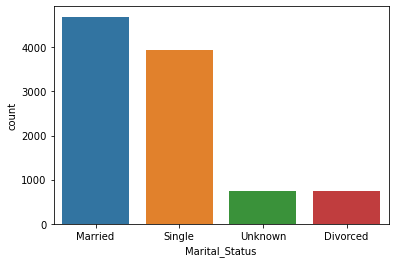

In [15]:
sns.countplot(df['Marital_Status'])

<AxesSubplot:xlabel='Income_Category', ylabel='count'>

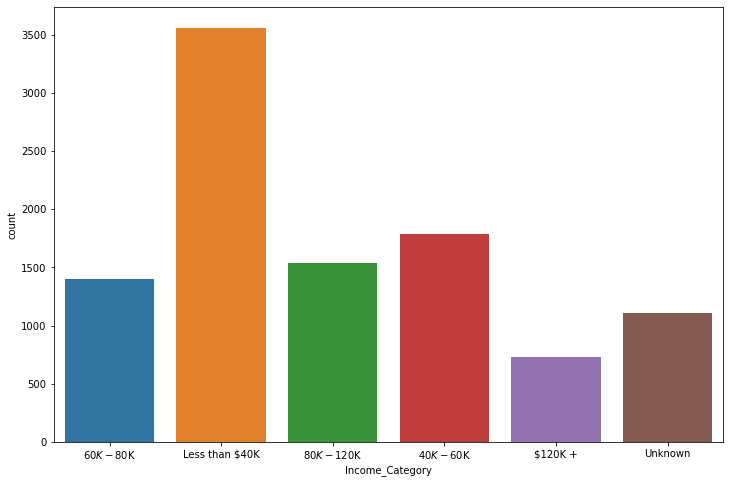

In [16]:
plt.figure(figsize=(12,8))
sns.countplot(df['Income_Category'])

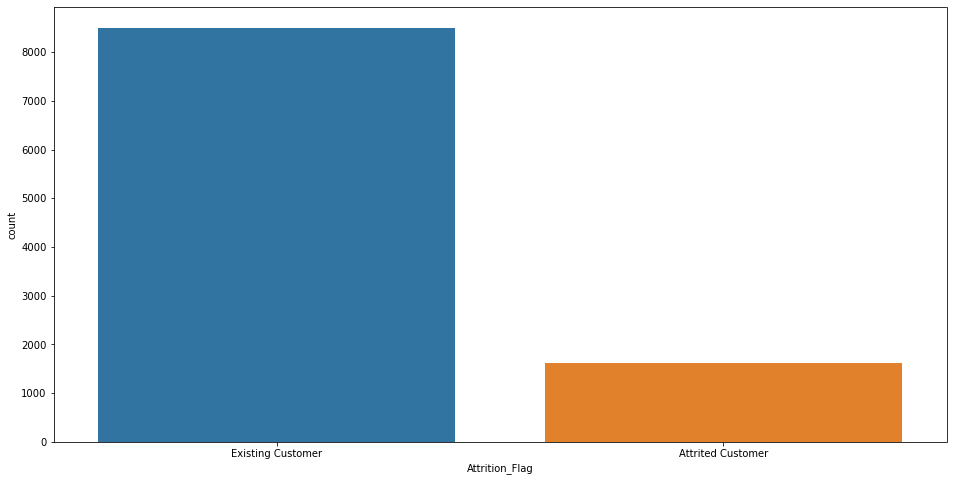

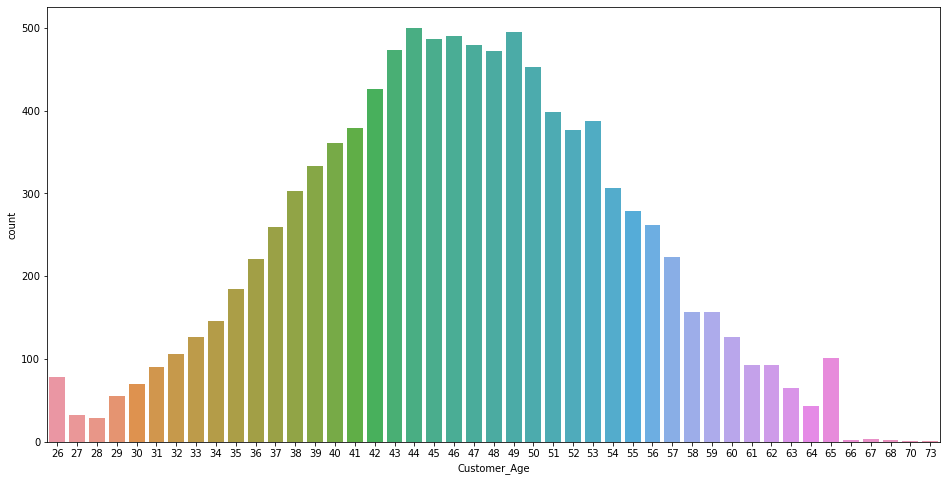

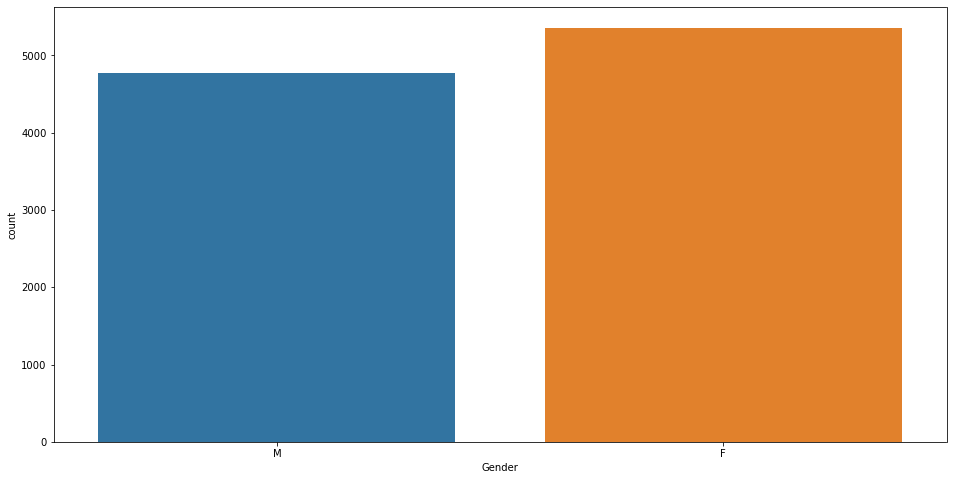

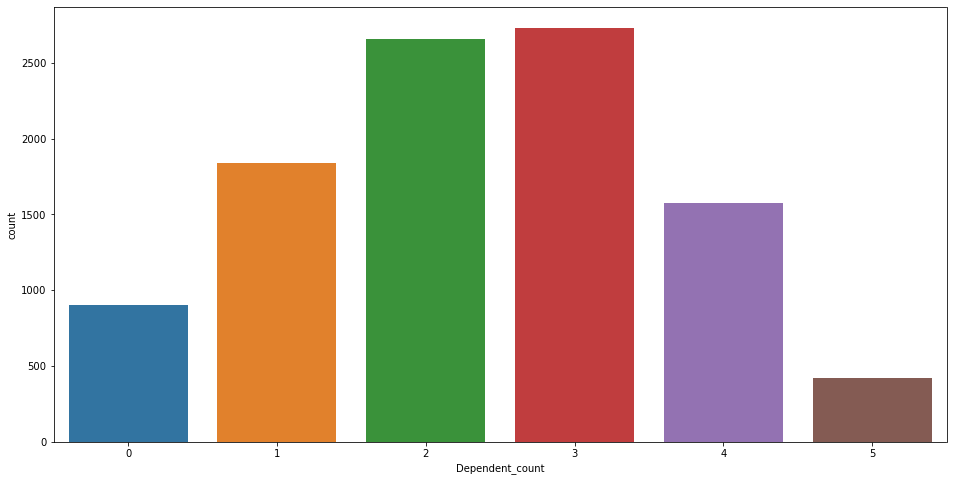

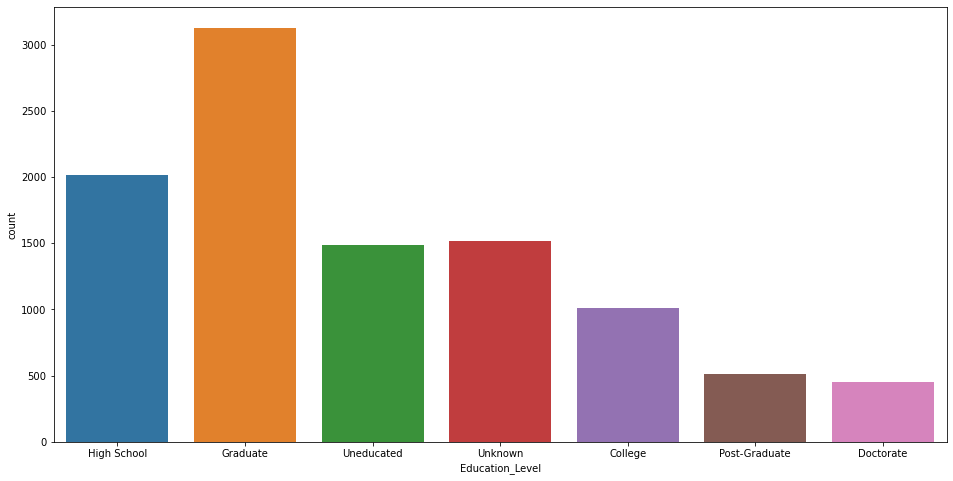

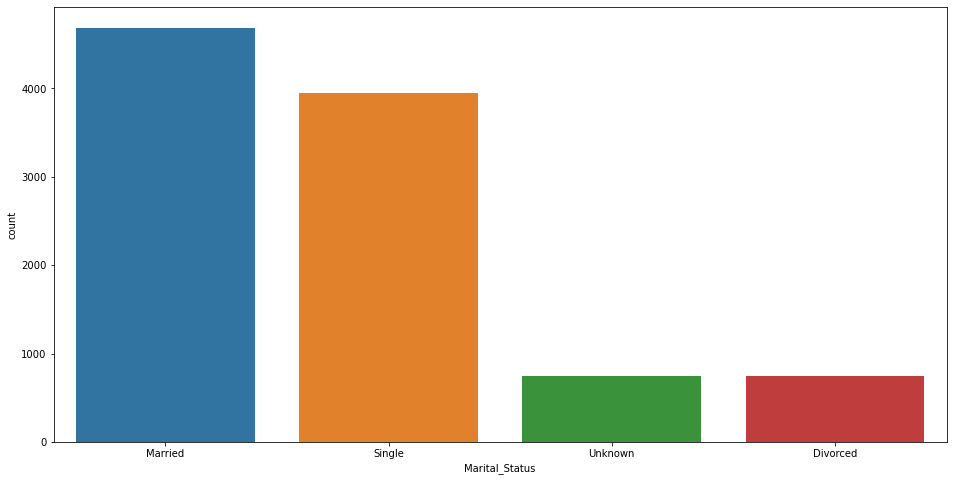

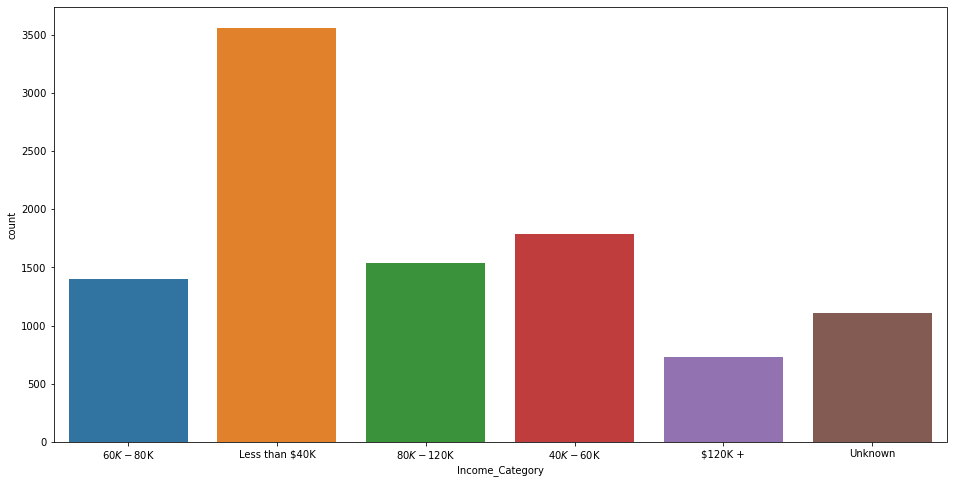

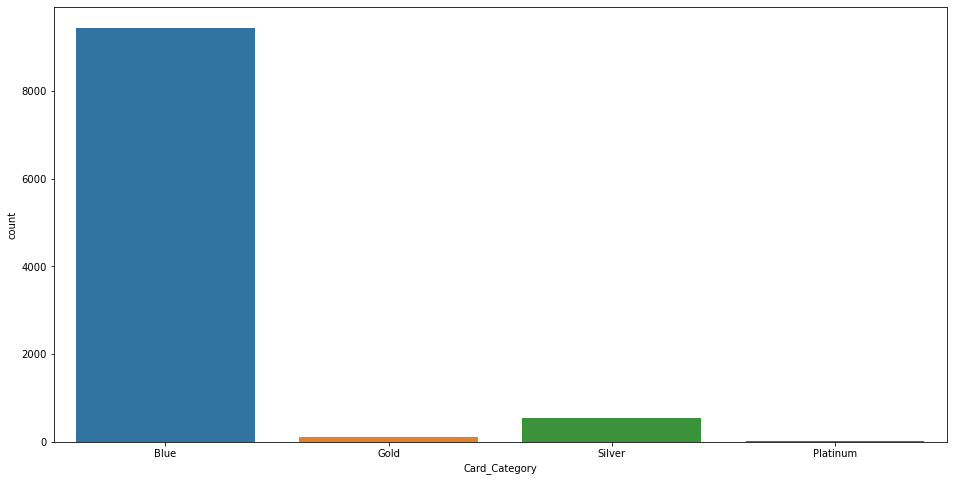

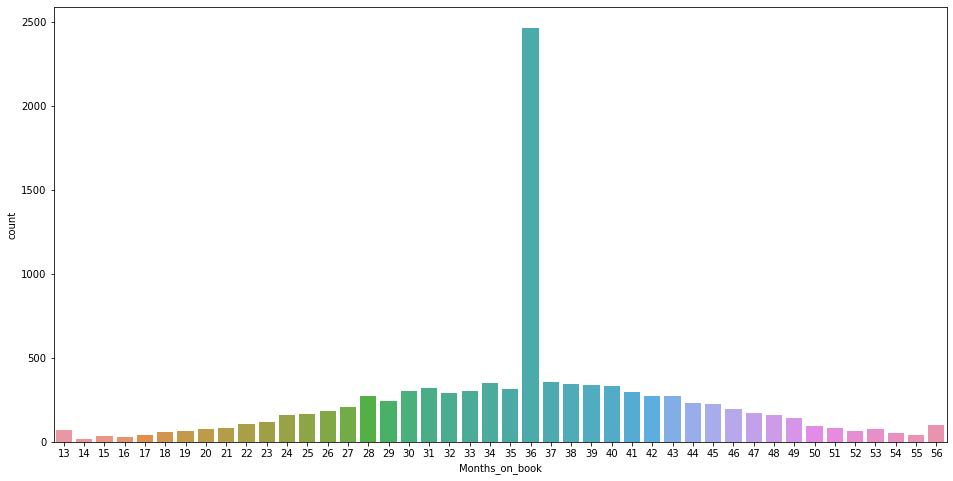

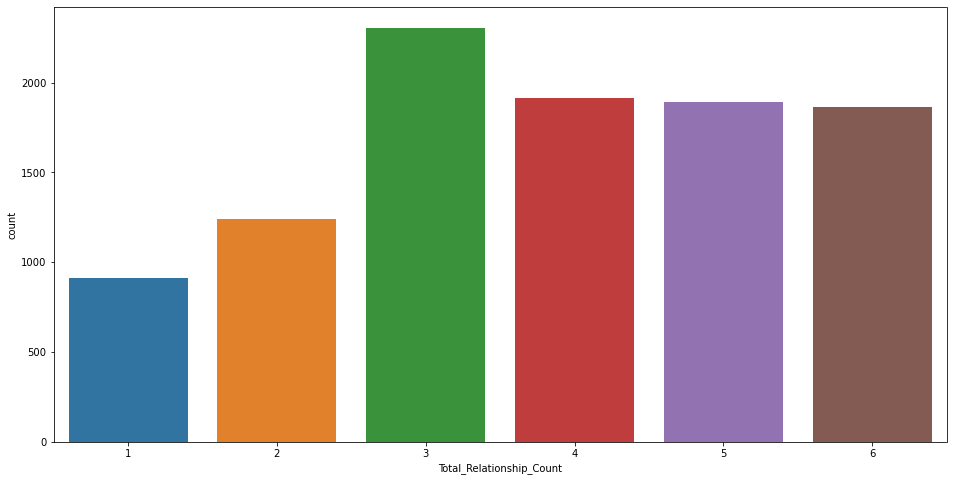

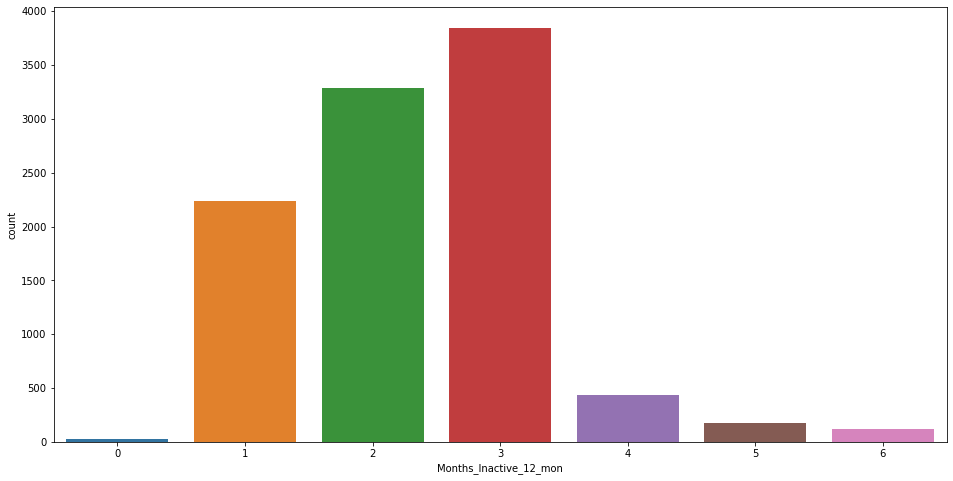

In [17]:
# countplot for each column
for ea in df.columns[0:11]: # Slicing the first 12 columns since the latter columns weren't contributing anything w/ these plots
    plt.figure(figsize = (16,8)) # increase plt size, since x-axis were being scrambled
    sns.countplot(df[ea])

Observations:
* Several Columns have "unknown" values:
    * Marital_Status, Income_Category, Education
    * ACTION: impute a different value for these - DONE
* Blue is by far the most popular card
* Age could be binned - ACTION - DONE
* Months_on_book - could be binned - ACTION - DONE
* ACTION: Boxplot Education_Level vs Income w/ Hue=Customer? - others: Marital_Status, Dependent_Count - DONE

# Data Preprocessing

In [9]:
# getting the mode for Marital Status Column
Marital_status_mode = df['Marital_Status'].mode().iloc[0]
Marital_status_mode

'Married'

In [10]:
# Getting the mode for Income category
Income_category_mode = df['Income_Category'].mode().iloc[0]
Income_category_mode

'Less than $40K'

In [11]:
# Getting the mode for Education column
Education_level_mode = df['Education_Level'].mode().iloc[0]
Education_level_mode

'Graduate'

In [12]:
# defining functions to impute the Mode for Marital, Income and Education
def convert_to_married(value):
    if value == 'Unknown':
        return(Marital_status_mode)
    else:
        return(value)

In [13]:
def convert_to_income(value):
    if value == 'Unknown':
        return(Income_category_mode)
    else:
        return(value)

In [14]:
def convert_to_education(value):
    if value == 'Unknown':
        return(Education_level_mode)
    else:
        return(value)

In [15]:
# convert all 'unknown' values to the mode
df['Marital_Status'] = df['Marital_Status'].apply(convert_to_married)

In [16]:
# convert all 'unknown' values to the mode
df['Income_Category'] = df['Income_Category'].apply(convert_to_income)

In [17]:
# convert all 'unknown' values to the mode
df['Education_Level'] = df['Education_Level'].apply(convert_to_education)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [18]:
# Fixing the Data Types
# Convert the Object Columns to Category
for ea in df.columns:
    if df[ea].dtype == 'object':
        df[ea] = pd.Categorical(df[ea])

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  category
 1   Customer_Age              10127 non-null  int64   
 2   Gender                    10127 non-null  category
 3   Dependent_count           10127 non-null  int64   
 4   Education_Level           10127 non-null  category
 5   Marital_Status            10127 non-null  category
 6   Income_Category           10127 non-null  category
 7   Card_Category             10127 non-null  category
 8   Months_on_book            10127 non-null  int64   
 9   Total_Relationship_Count  10127 non-null  int64   
 10  Months_Inactive_12_mon    10127 non-null  int64   
 11  Contacts_Count_12_mon     10127 non-null  int64   
 12  Credit_Limit              10127 non-null  float64 
 13  Total_Revolving_Bal       10127 non-null  int6

In [30]:
df.head()

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
0  Existing Customer            45      M                3     High School   
1  Existing Customer            49      F                5        Graduate   
2  Existing Customer            51      M                3        Graduate   
3  Existing Customer            40      F                4     High School   
4  Existing Customer            40      M                3      Uneducated   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0        Married     $60K - $80K          Blue              39   
1         Single  Less than $40K          Blue              44   
2        Married    $80K - $120K          Blue              36   
3        Married  Less than $40K          Blue              34   
4        Married     $60K - $80K          Blue              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000

In [8]:
# function to convert Attrition_Flag Column to 1's and 0's
def existing_customer(value):
    if value == 'Existing Customer':
        return(1)
    else:
        return(0)

In [9]:
# Changing 'Attrition_Flag' to 1's and 0's and Renaming the Columns to 'Current Customer?'
df['Current_Customer?'] = df['Attrition_Flag'].apply(existing_customer)


In [10]:
# drop the Attrition_Flag Column now
df.drop('Attrition_Flag', axis=1, inplace=True)

# Exploratory Data Analysis

<AxesSubplot:xlabel='Income_Category', ylabel='count'>

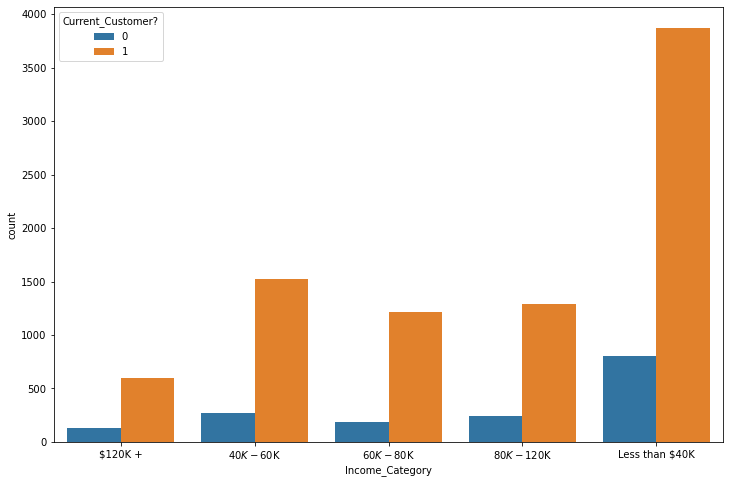

In [34]:
plt.figure(figsize=(12,8))
sns.countplot(df['Income_Category'], hue=df['Current_Customer?'])

In [35]:
df.head()

Customer_Age Gender  Dependent_count Education_Level Marital_Status  \
0            45      M                3     High School        Married   
1            49      F                5        Graduate         Single   
2            51      M                3        Graduate        Married   
3            40      F                4     High School        Married   
4            40      M                3      Uneducated        Married   

  Income_Category Card_Category  Months_on_book  Total_Relationship_Count  \
0     $60K - $80K          Blue              39                         5   
1  Less than $40K          Blue              44                         6   
2    $80K - $120K          Blue              36                         4   
3  Less than $40K          Blue              34                         3   
4     $60K - $80K          Blue              21                         5   

   Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
0                       1                      3       12691.0   
1                       1                      2        8256.0   
2                       1                      0        3418.0   
3                       4                      1        3313.0   
4                       1                      0        4716.0   

   Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0                  777          11914.0                 1.335   
1                  864           7392.0                 1.541   
2                    0           3418.0                 2.594   
3                 2517            796.0                 1.405   
4                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0             1144              42                1.625   
1             1291              33                3.714   
2             1887              20                2.333   
3             1171              20                2.333   
4              816              28                2.500   

   Avg_Utilization_Ratio Current_Customer?  
0                  0.061                 1  
1                  0.105                 1  
2                  0.000                 1  
3                  0.760                 1  
4                  0.000                 1

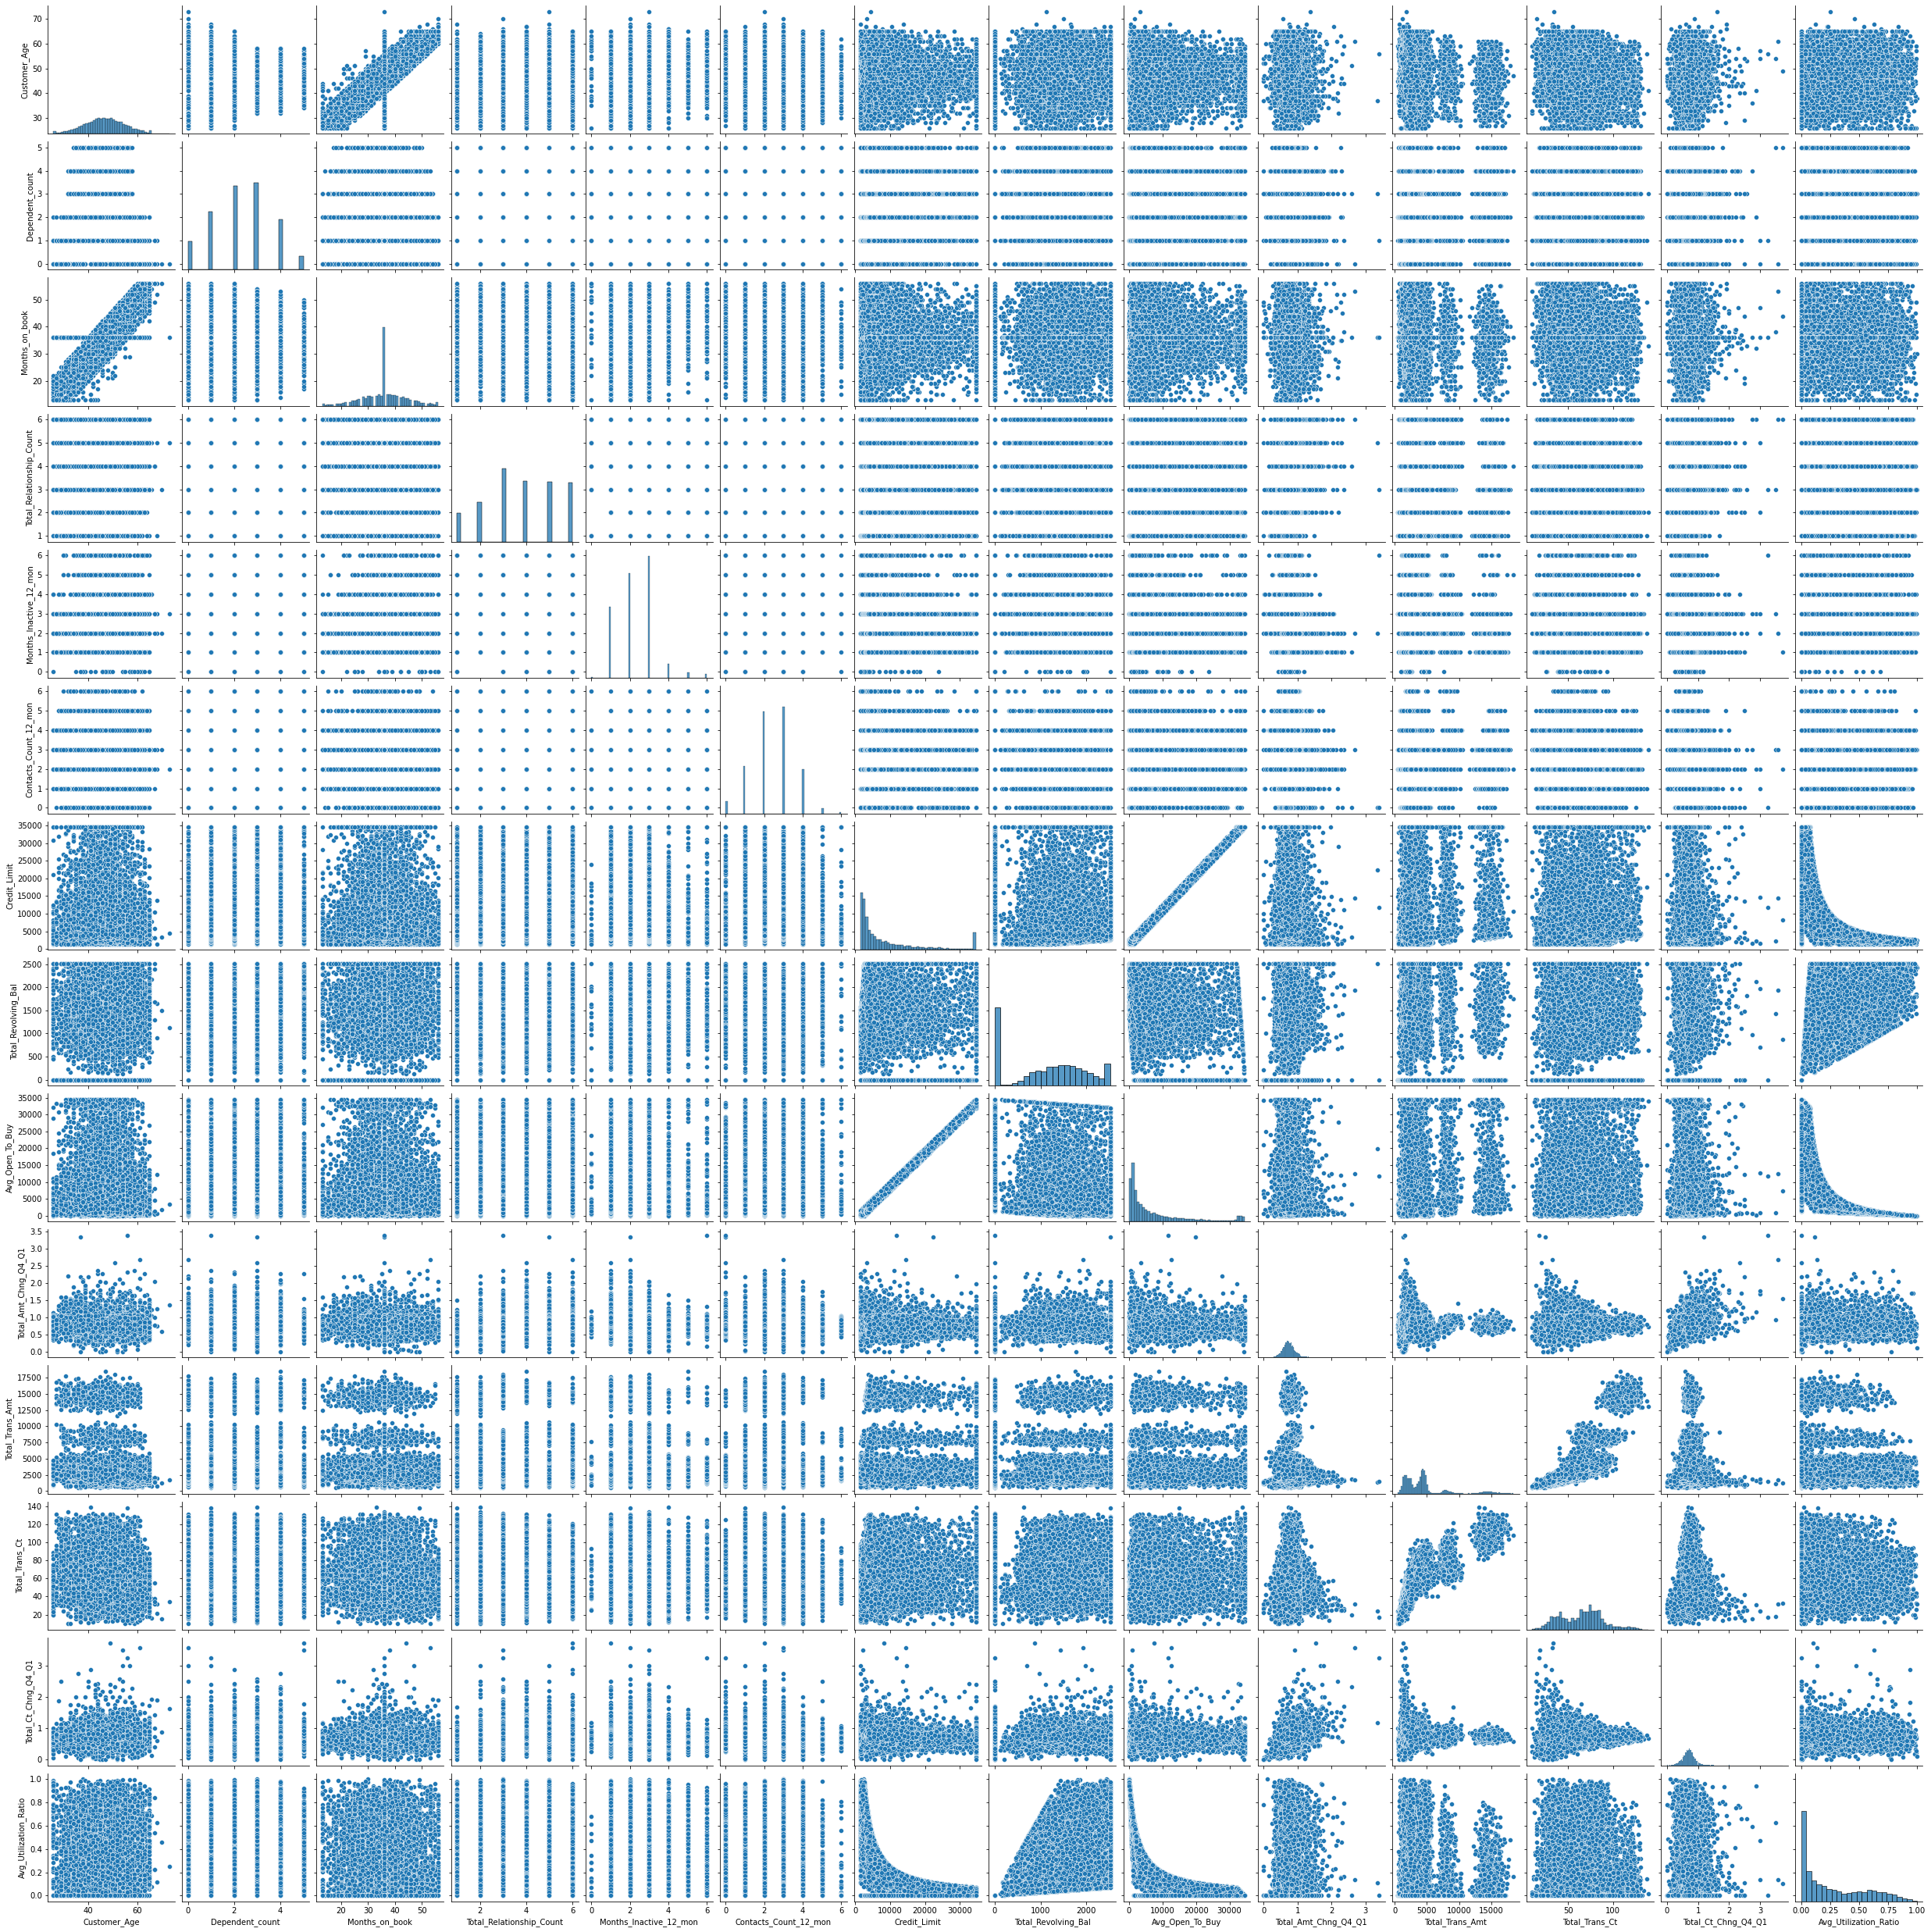

In [36]:
sns.pairplot(df)

Observations:
* Strong Correlations:
    * Months On Books vs Age
    * Avg_Open_toBuy vs Credit Limit
    * Avg_Utiliztion_Ratio vs Credit Limit
    * Avg_Utiliztion Ratio vs Total_Revolving Bal
    * Avg_Utilization Ratio vs Avg_Open_to_Buy
    * Tot_Ct_Chng_Q4-Q1 vs Total_amount chng Q4Q1 (homodescasity??) 
    * Total_Trans_Ct vs Total_Trans_Amt
    

<AxesSubplot:>

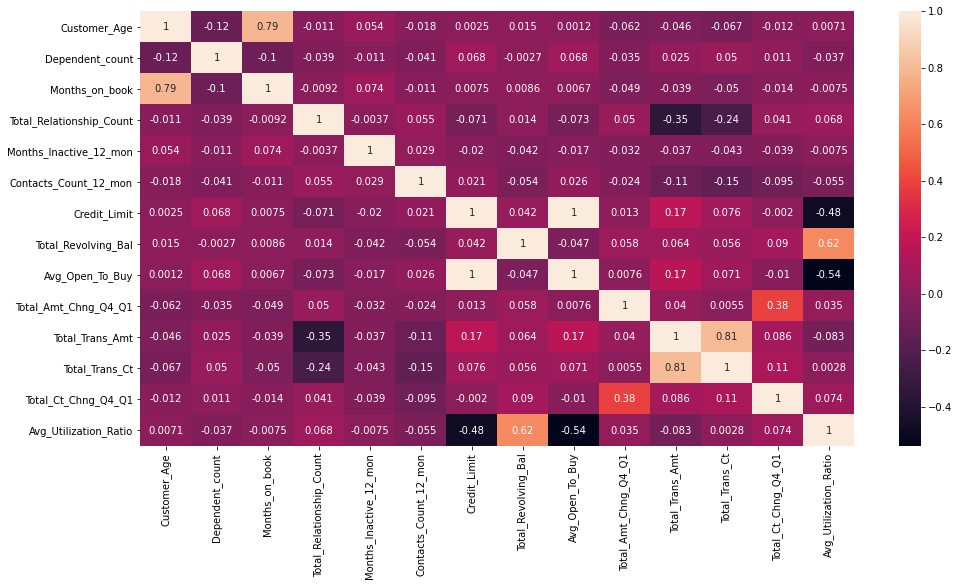

In [37]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(), annot=True)

Observations:
* High Correlations:
    * Months_on_book vs Age (0.79) ACTION: Drop Months_on_book??
    * Avg_Utilization_Ratio vs Total_Revolving_Bal (0.62)
    * Total_Trans_Amt vs. Total_Trans_Ct (0.81) ACTION: Drop one of these columns??
    * 1.0 correlation Avg_Open_To_Buy vs. Credit_limit - ACTION: Drop Avg_Open_To_Buy due to collinearity - DONE

In [22]:
df.drop('Avg_Open_To_Buy', axis=1, inplace=True)

In [23]:
# defining a function to plot boxplot above a histogram - plus formatting the background, size and colors
def histogram_boxplot(feature, figsize=(15,10), bins=None):
    f2, (ax_box2, ax_hist2, ) = plt.subplots(nrows = 2, # number of rows of the subplot grid
                                          sharex = False, #x-axis will NOT be shared among subplots
                                          gridspec_kw = {"height_ratios": (.25, .75)},
                                          figsize = figsize
                                          ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='navy') # boxplot will be created and a triangle will show the mean
    sns.distplot(feature, kde=False, ax=ax_hist2, bins = bins, color="navy") if bins else sns.distplot(feature, kde=False, color = 'navy')
    ax_hist2.axvline(np.mean(feature), color='blue', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') #Add median to histogram
    ax_box2.set_facecolor("whitesmoke") #adding a background color to boxplot
    ax_hist2.set_facecolor("whitesmoke") #adding a background color to histogram

In [24]:
# building a list for the columns in the df, which are only numeric
numeric_columns = []
for colname in df.columns[df.dtypes != 'category']:
    numeric_columns.append(colname)

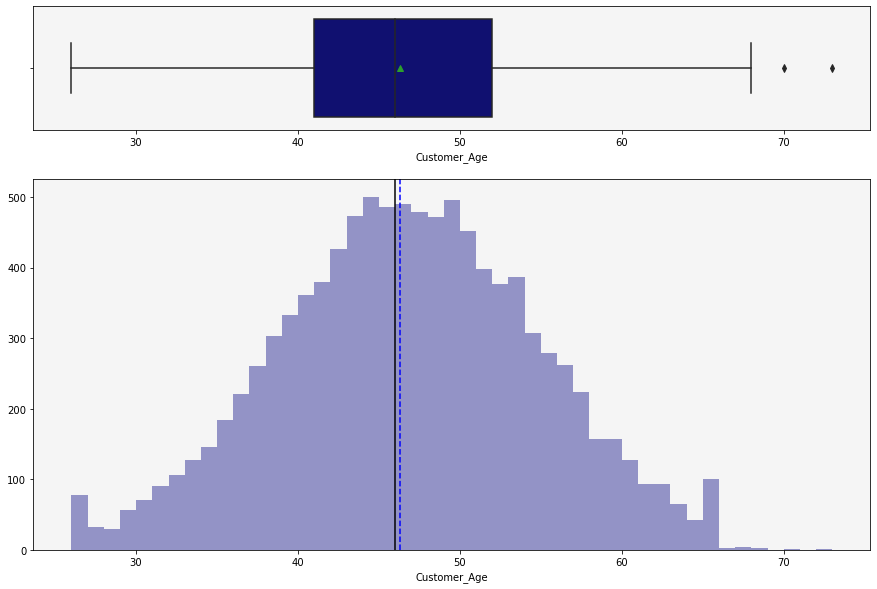

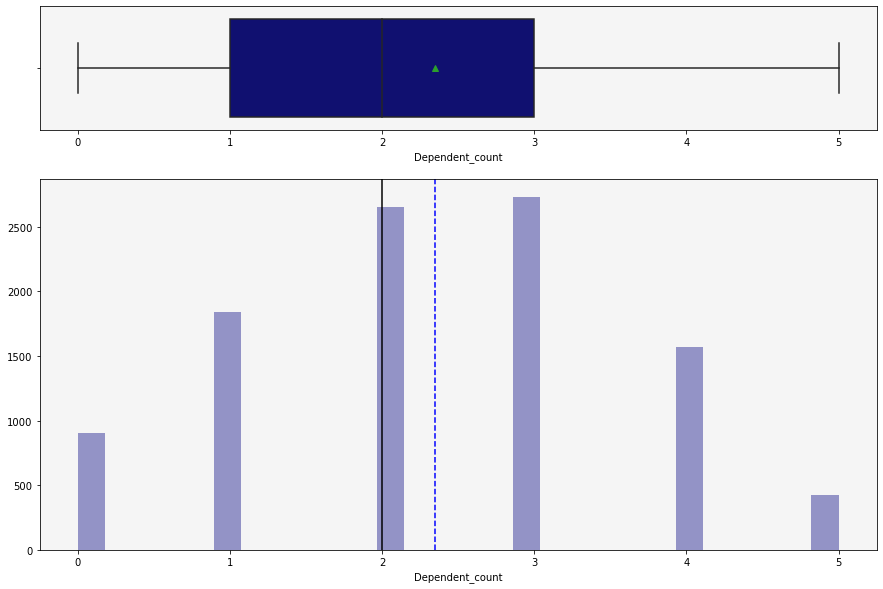

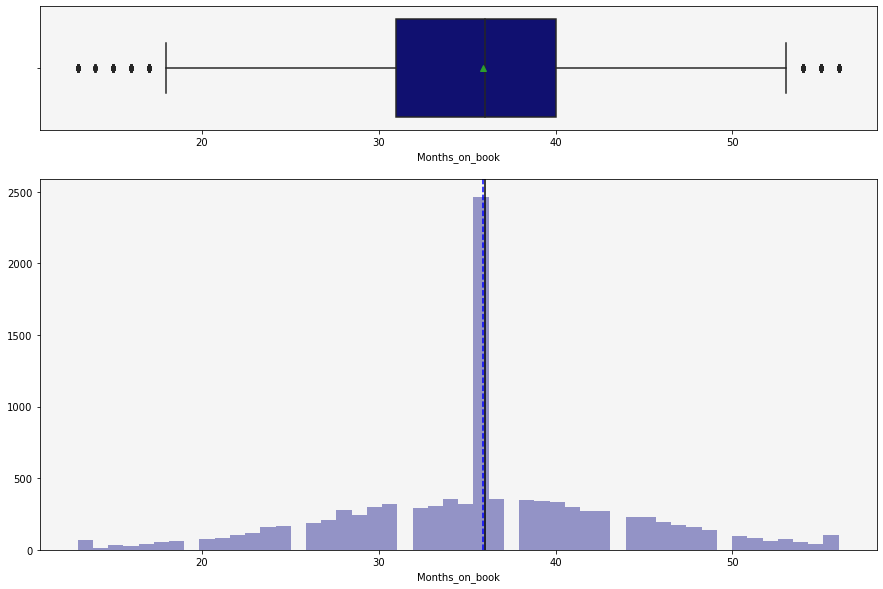

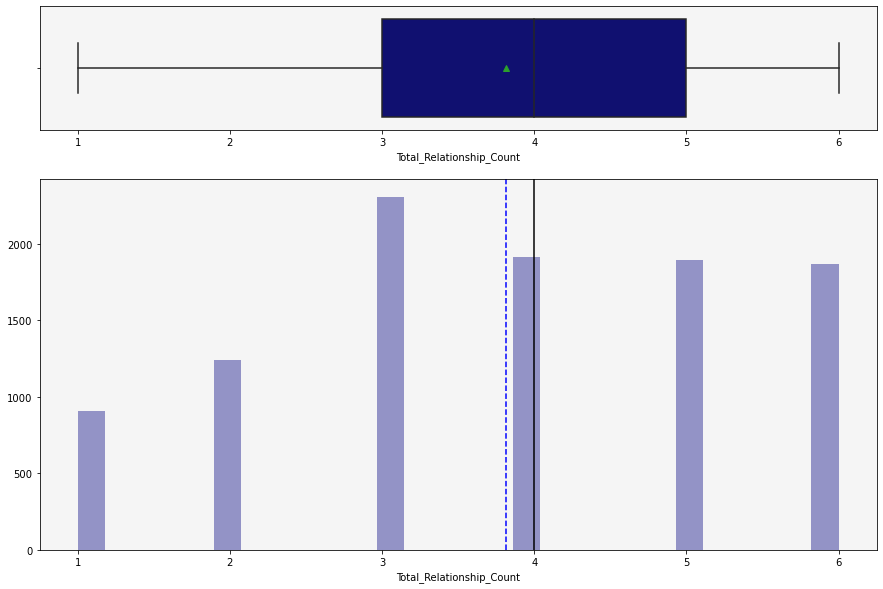

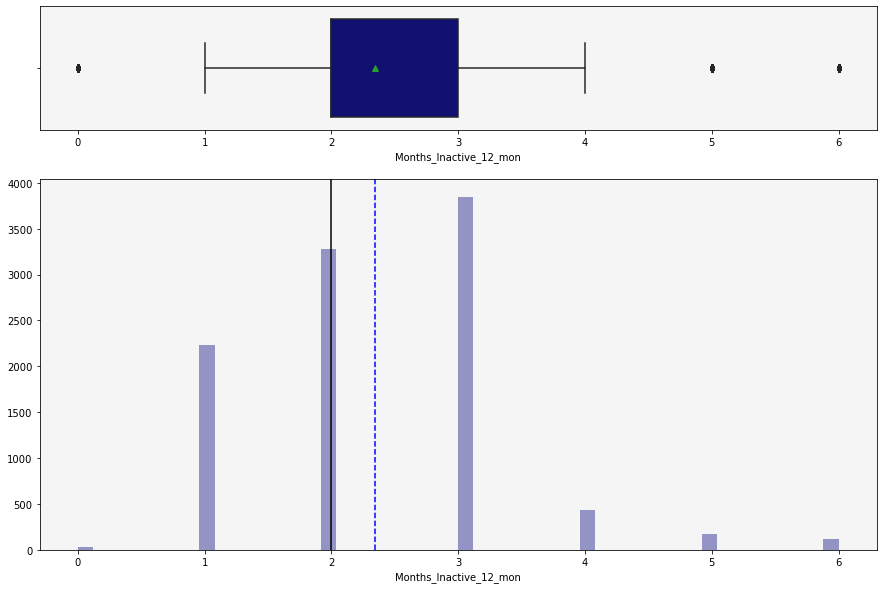

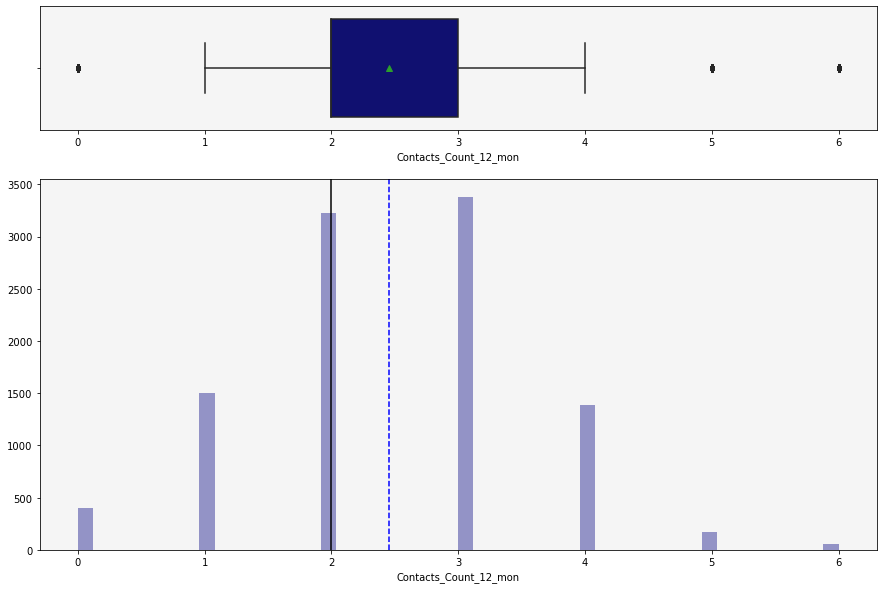

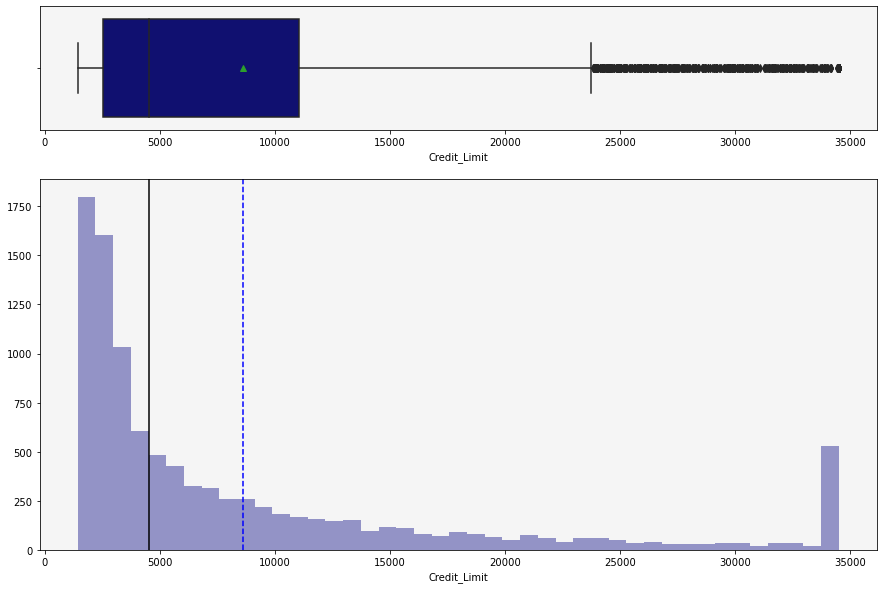

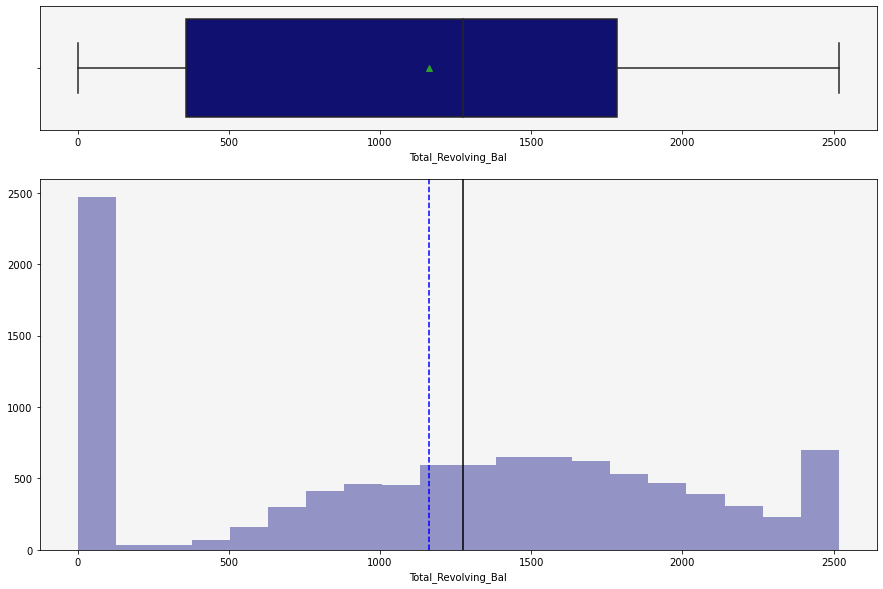

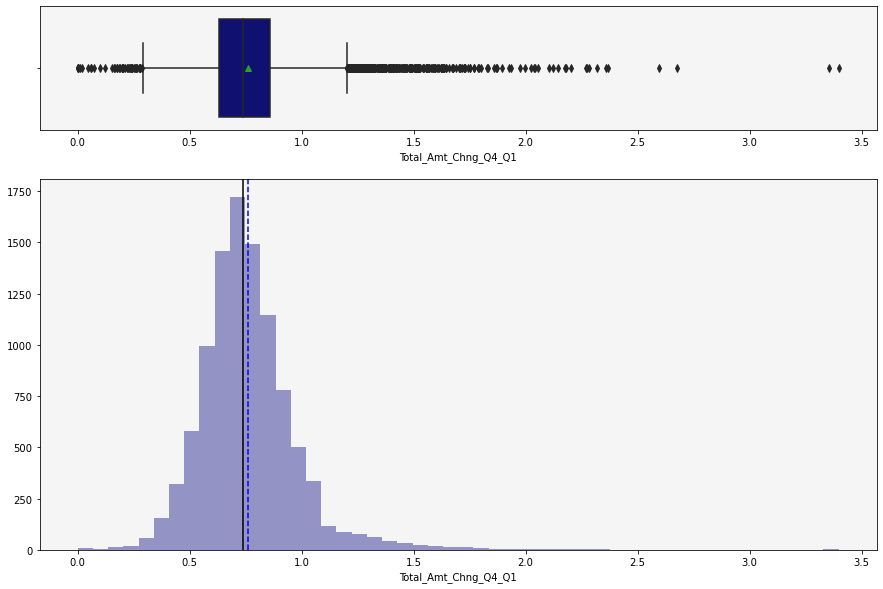

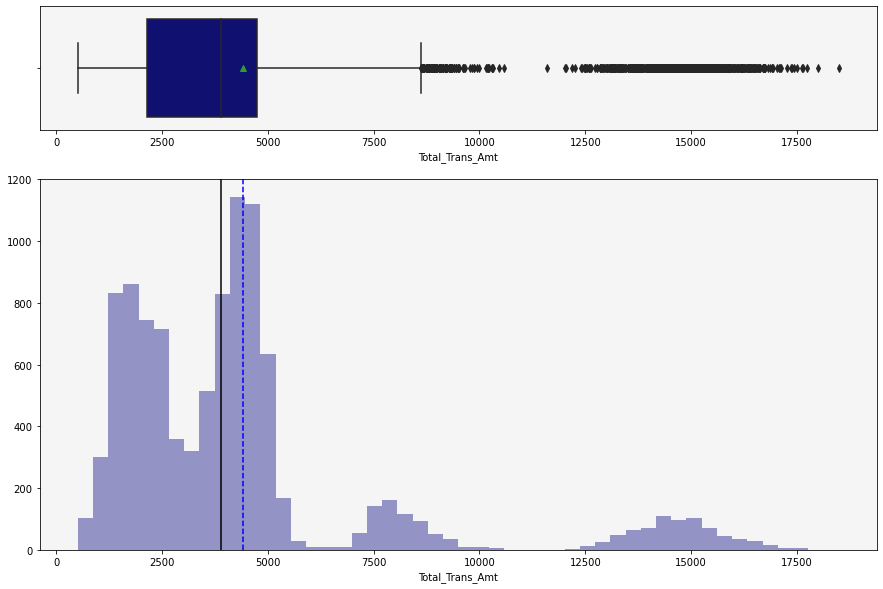

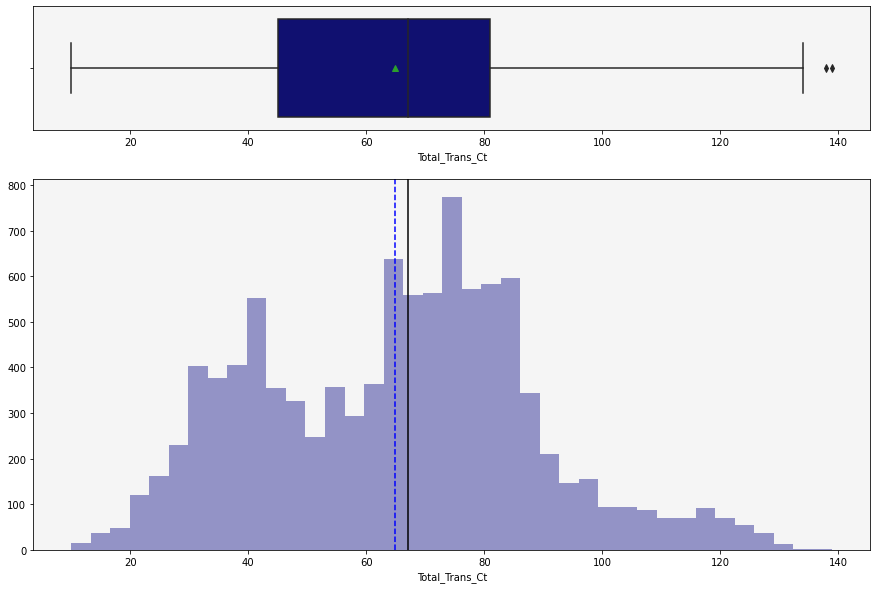

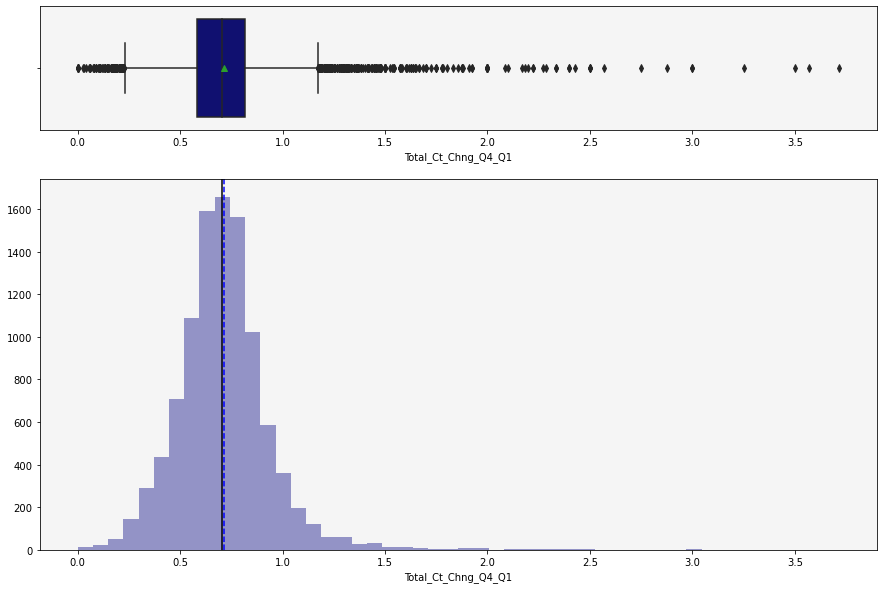

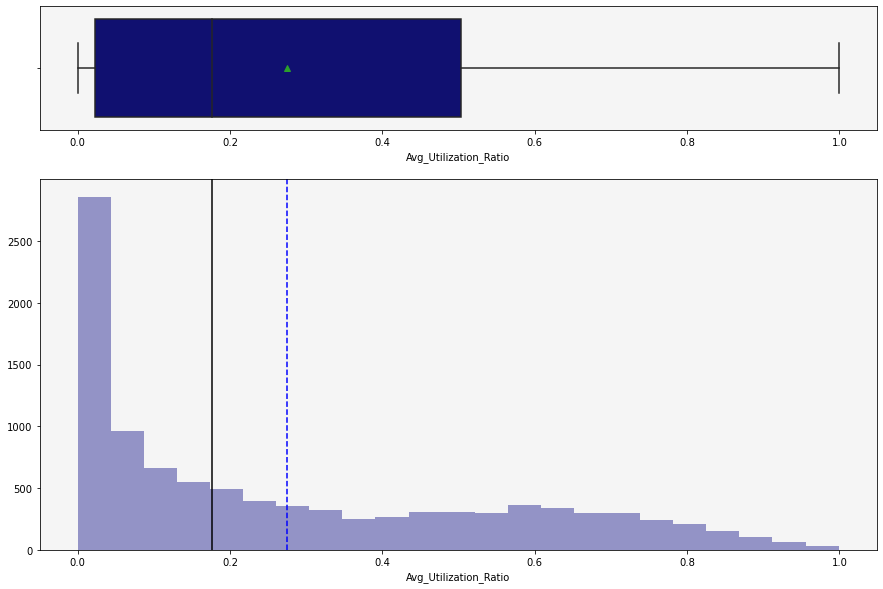

In [41]:
# running a loop through the columns list and plotting the boxplot/distplots 
for each in numeric_columns:
    plt.show()
    histogram_boxplot(df[each]) # for each column, run the histogram_boxplot function 
    

Observations:
* Age seems well balanced - from mid-20's to upper 60's
* Dependents - right skewed - from 0 to 5 
* Months_on_book - well balanced, heavily centered around 36-37
* Total_Relationship_count (No. of products held) - left skewed - median ~4
* Months_Inactive_12_mon - right skewed - main range: 2-3
* Credit_limit - heavily right skewed - from ~2,000 to nearly 35,000 
* Total_Revolving_Bal - left skewed -from 0 to 2,500
* Avg_Open_To_Buy - heavily right skewed - main range ~2000 - 10,000 but lots of outliers out to nearly 35,000
* Total_Trans_Amt - right skewed - possible Tier Classification approach: 0-2,500; 2,500-6,000; 6,000-11,000; 11,000+ - ACTION: boxplot vs Age? // Convert Column to Buckets - DONE

In [25]:
# build a list with all of the categorical columns
category_columns = []
for ea in df.describe(include=['category']).columns:
    category_columns.append(ea)

In [43]:
category_columns

['Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category',
 'Current_Customer?']

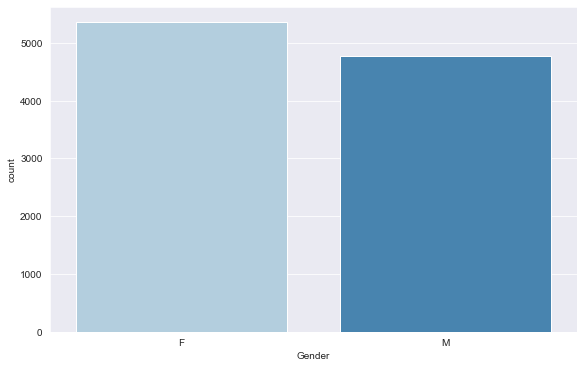

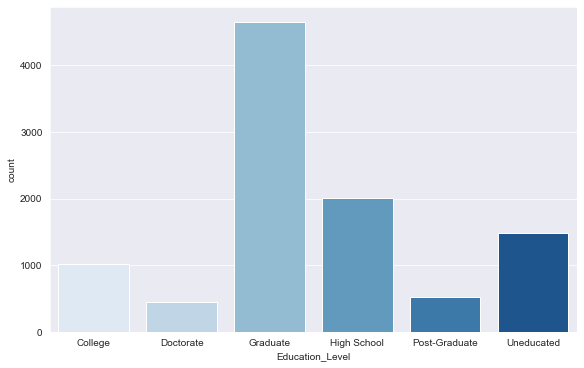

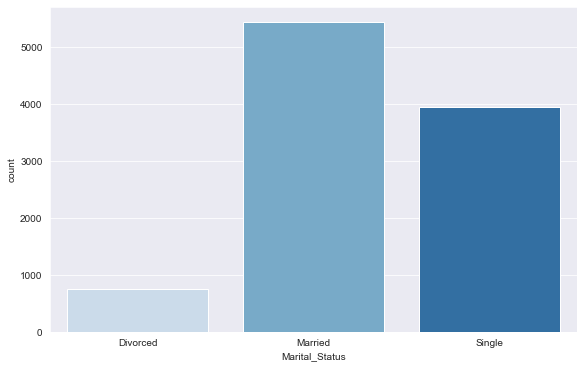

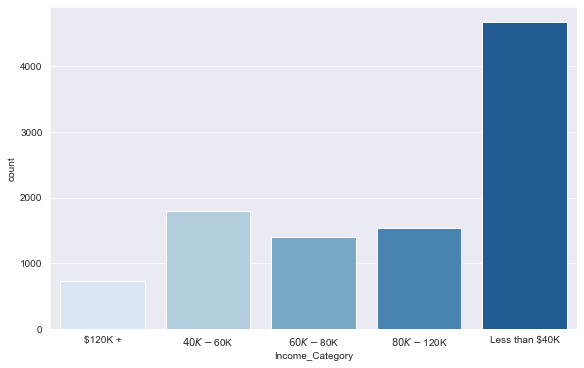

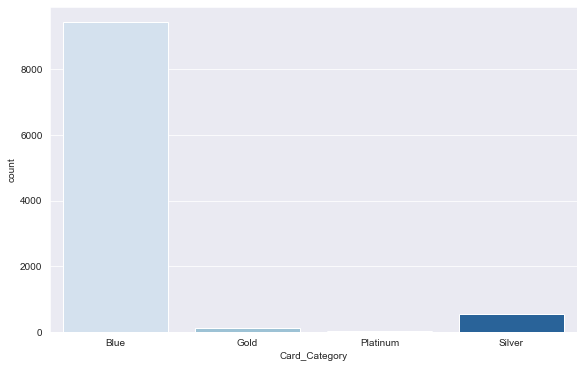

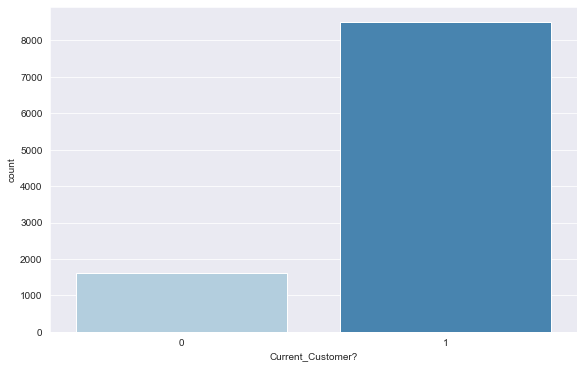

In [44]:
# running a loop through each categorical column and plotting a countplot
for ea in category_columns:
    plt.figure(figsize=(8,5), constrained_layout=True) #change size and constrained_layout True due to overlapping x-axis label
    sns.set_style("darkgrid")
    sns.countplot(df[ea], palette='Blues')

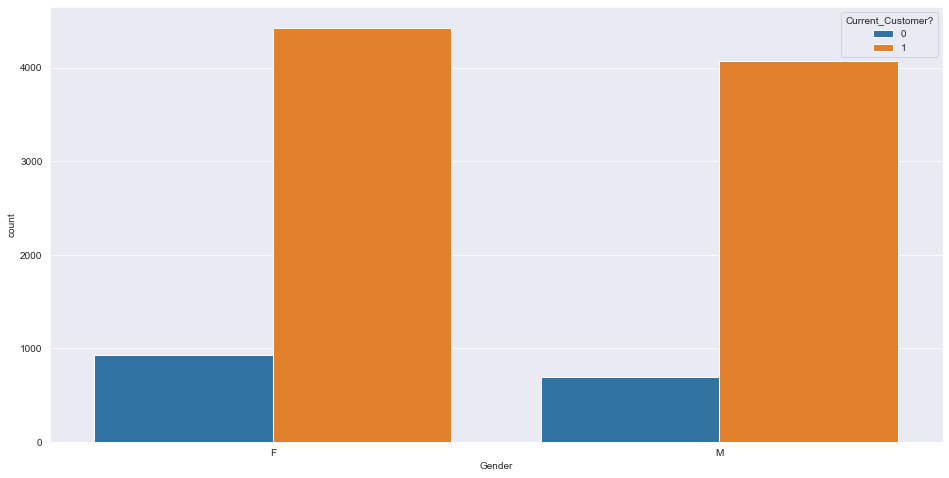

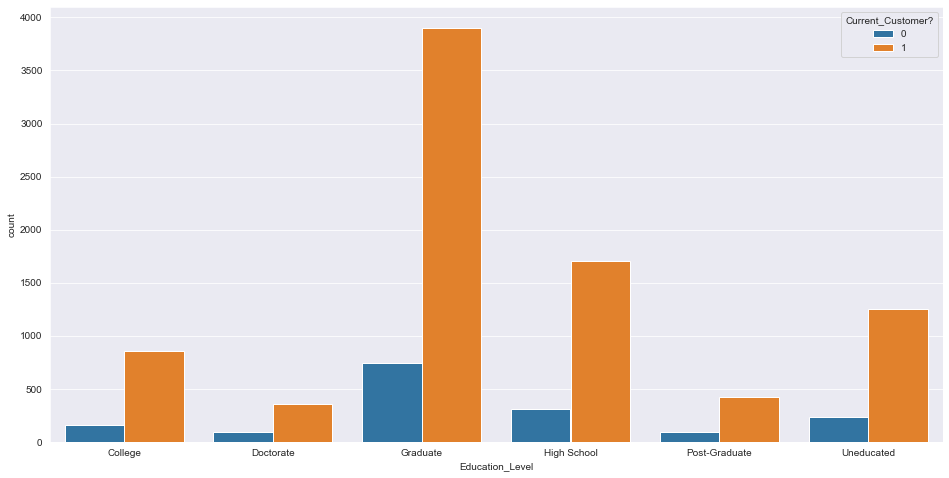

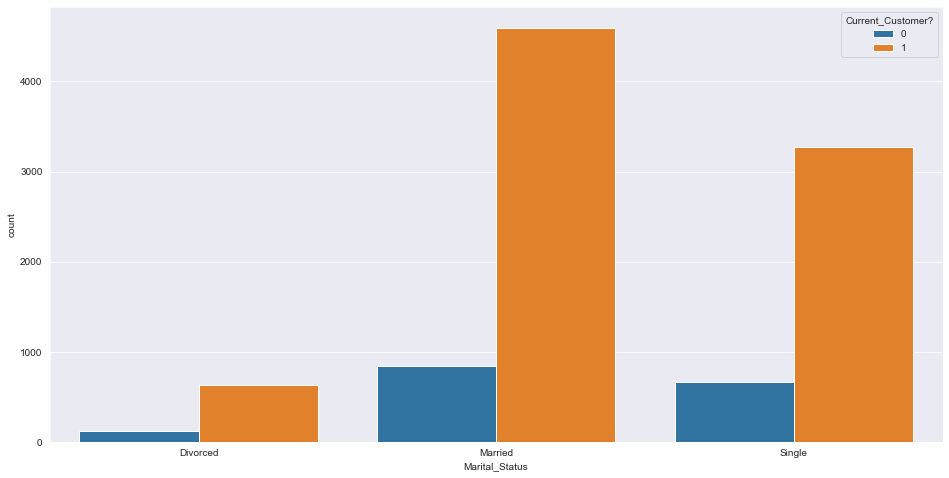

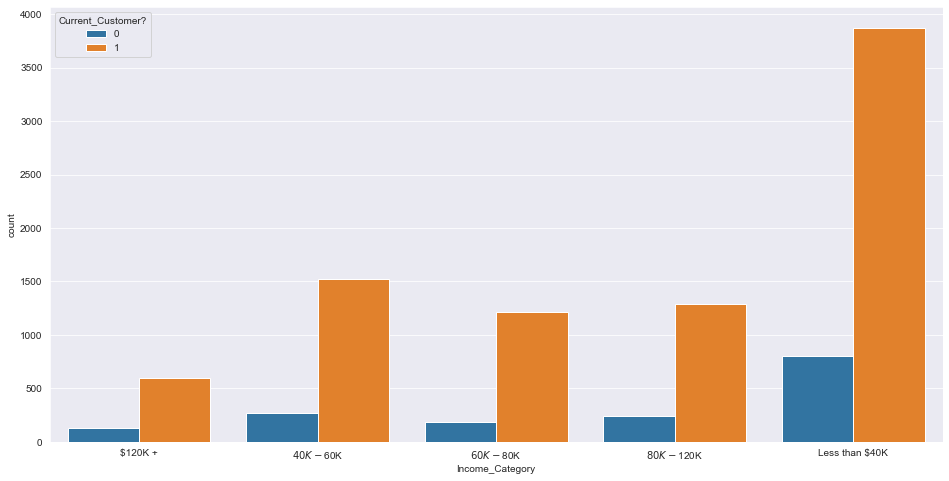

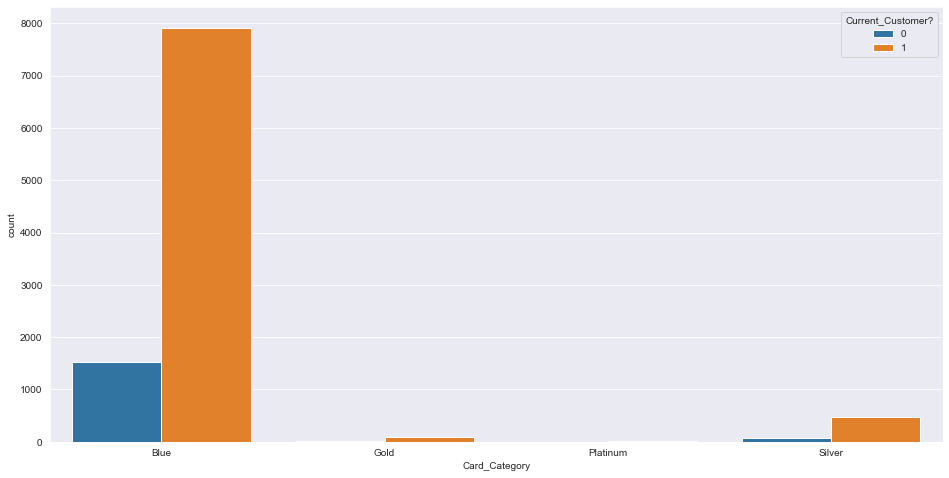

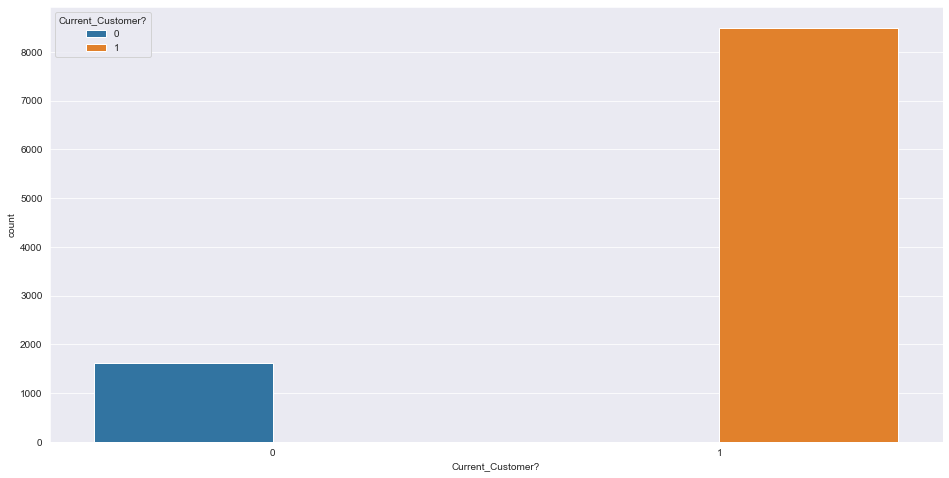

In [45]:
# running a loop through each categorical column and plotting a countplot - but with hue: "Current Customer?"
for ea in category_columns:
    plt.figure(figsize=(16,8))
    sns.countplot(df[ea], hue=df['Current_Customer?'])

Observations:
* More customers are female (over 5,000), but males aren't far behind (over 4,500)
* Graduate is the top category (over 5,000), with high school less than half (~2,000) for 2nd
* Divorced uses the product the least vs. Married and Single groups
* Majority of users make less than 40k group
* Blue is by far the most popular card (over 8,000)
* 16% attrition rate - 1627/(10127)

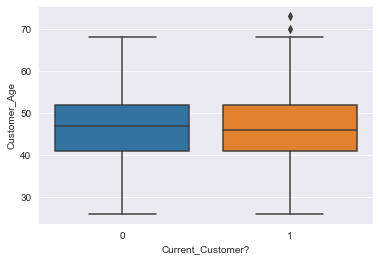

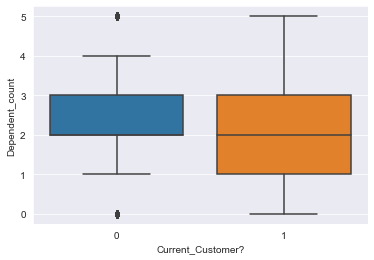

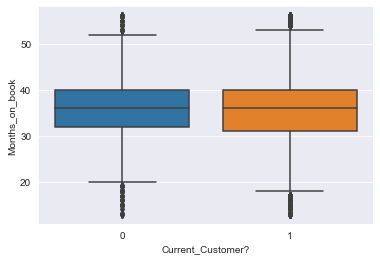

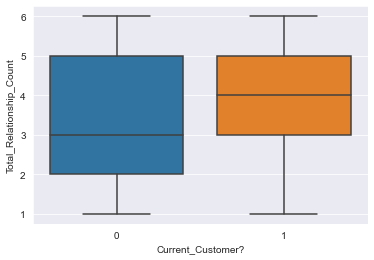

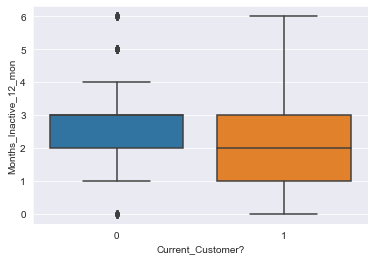

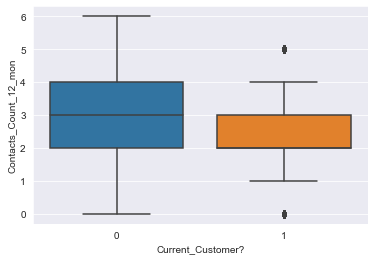

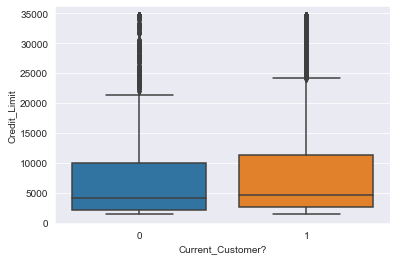

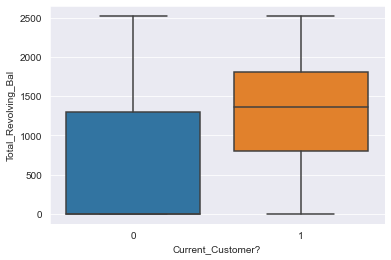

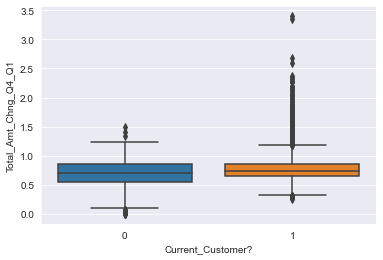

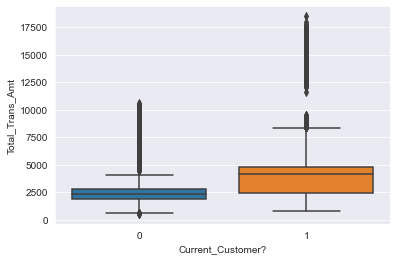

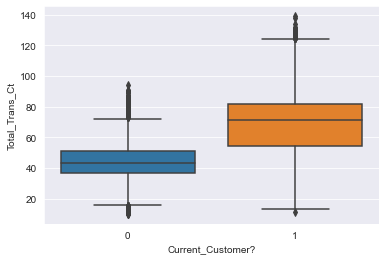

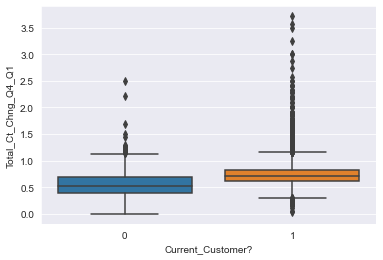

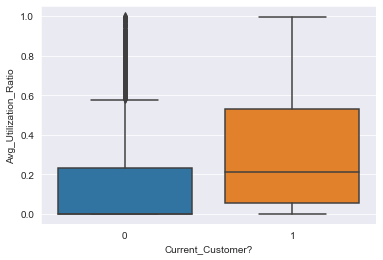

In [46]:
for ea in numeric_columns:
    plt.figure()
    sns.boxplot(x=df['Current_Customer?'], y=df[ea])
    

Observations:
* doesn't appear to be a disperancy with age and customers - ACTION: sns.countplot(df['Current_Customer?'],df[ea]) - DONE

ValueError: Image size of 386x151974 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 432x288 with 1 Axes>

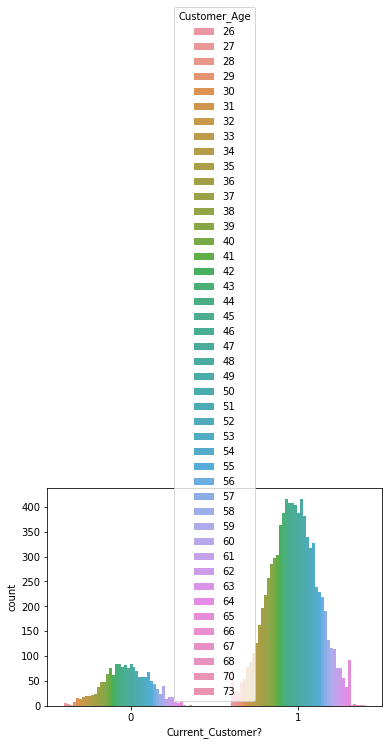

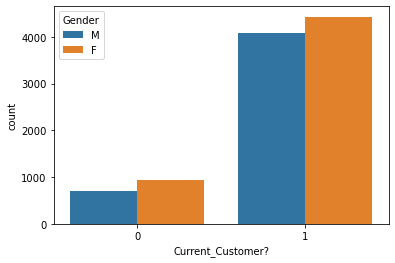

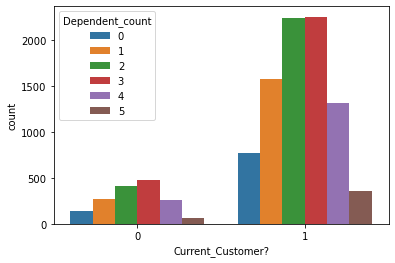

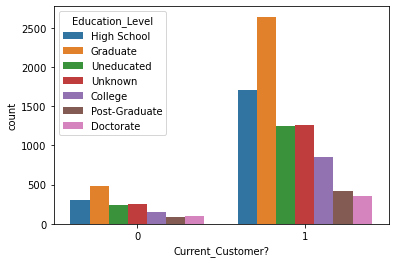

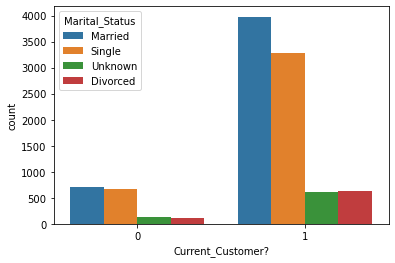

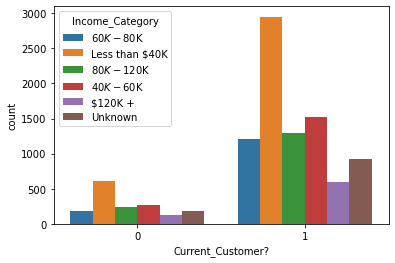

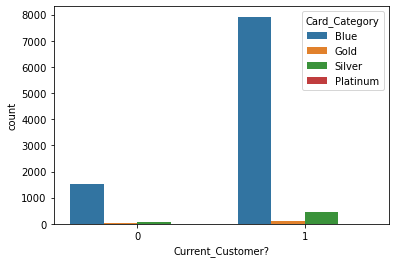

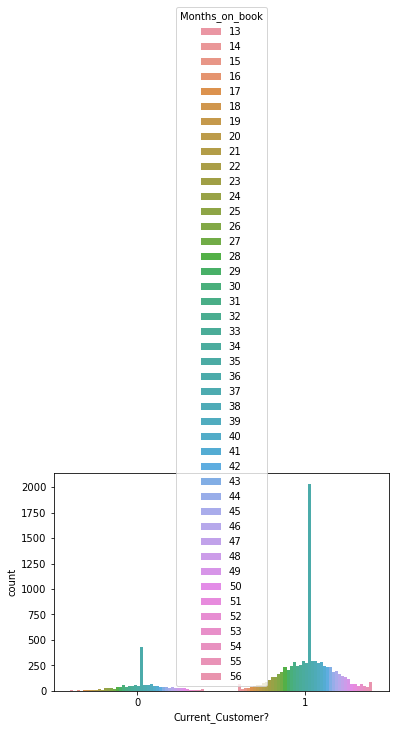

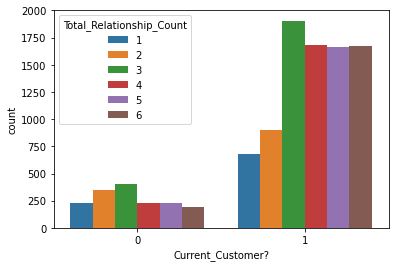

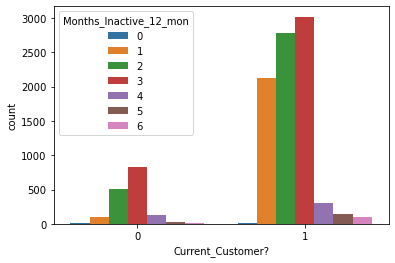

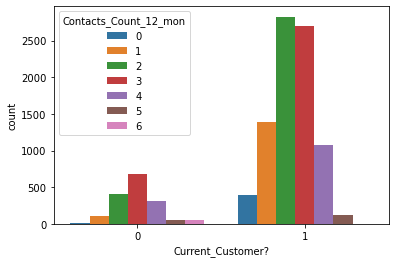

ValueError: Image size of 389x93145 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 432x288 with 1 Axes>

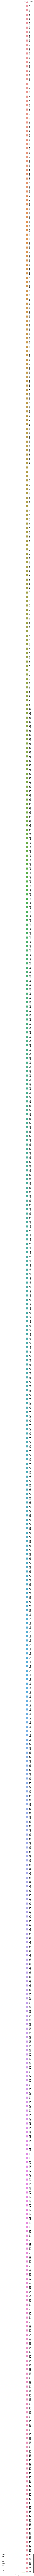

ValueError: Image size of 389x102265 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 432x288 with 1 Axes>

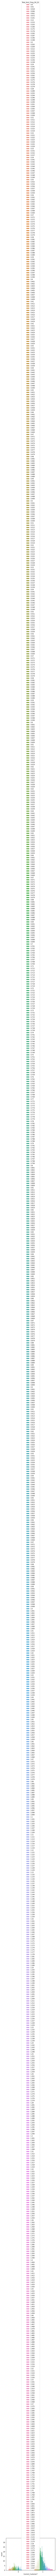

ValueError: Image size of 382x75565 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 432x288 with 1 Axes>

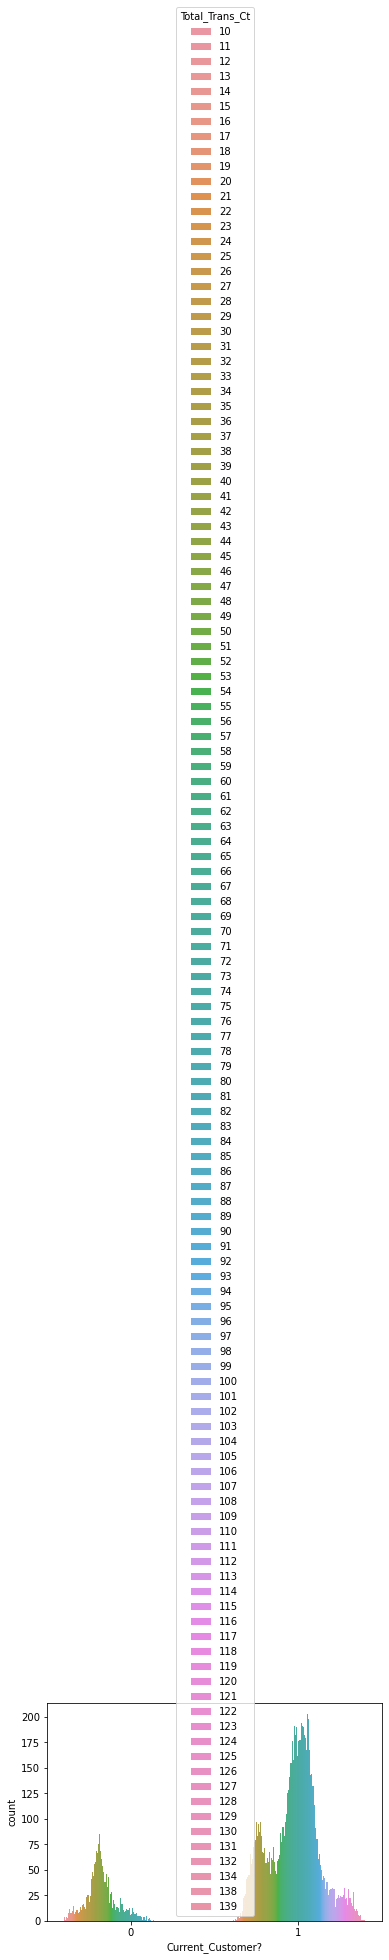

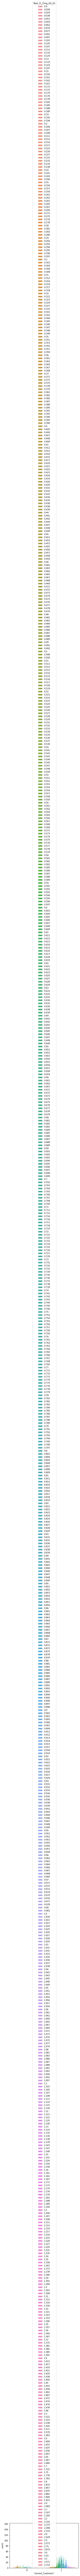

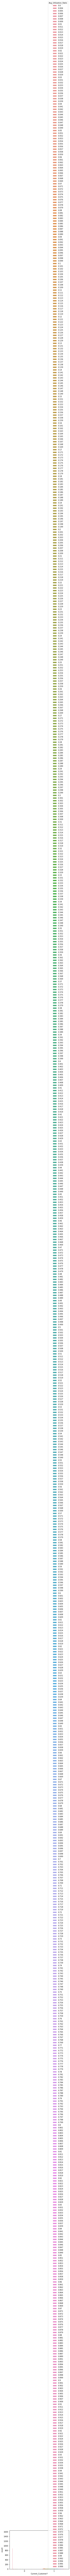

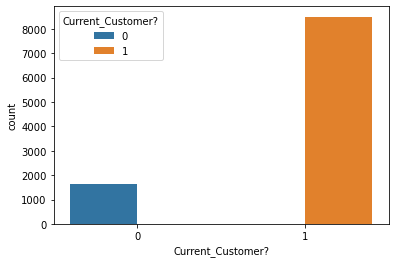

In [11]:
for ea in df.columns:
    plt.figure()
    sns.countplot(df['Current_Customer?'], hue=df[ea])

Observations:
* Female usage, slightly higher than Male
* Graduate students, highest count among users
* Married, highest among users in marital_status
* Less than 40k, hightest among users
* Blue is definitely the most popular card - ACTION, check Platinum - DONE: only 20, least popular
* ACTION: redo the countplots with the binned categories: Customer_Age, Months_on_Book, Total_Revolving_Bal, Total_Trans_Amt - DONE



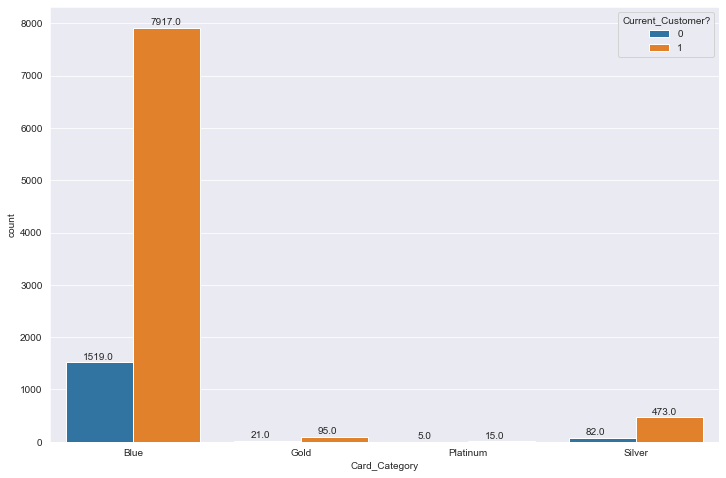

In [48]:
# showing the numerical values - since Platinum's value is so low
plt.figure(figsize = (12,8))
ax = sns.countplot(x='Card_Category',hue='Current_Customer?',data=df)

for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

In [49]:
df['binned_12month_trans_amount'] = pd.cut(df['Total_Trans_Amt'], [-1,2500,6000,11000,18500], labels=['Under $2,500','$2,500-$6,000', '$6,000-$11,000', '$11,000+'])
df.drop('Total_Trans_Amt', axis=1, inplace=True)

<AxesSubplot:xlabel='binned_12month_trans_amount', ylabel='count'>

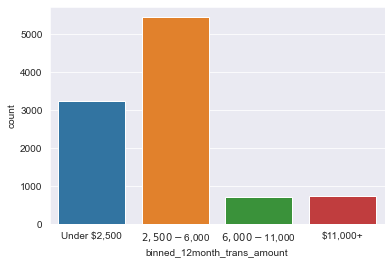

In [50]:
sns.countplot(df['binned_12month_trans_amount'])

Observation:
* 2500-6000 is most popular with under 2500 2nd
* Recommendation: improve incentives for largers trans_amount

<AxesSubplot:xlabel='binned_12month_trans_amount', ylabel='count'>

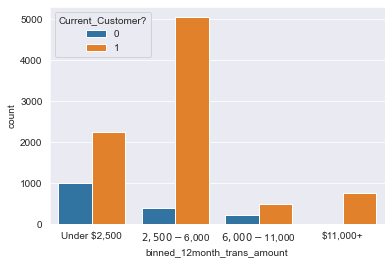

In [51]:
sns.countplot(df['binned_12month_trans_amount'], hue=df['Current_Customer?'])

<AxesSubplot:xlabel='binned_12month_trans_amount', ylabel='count'>

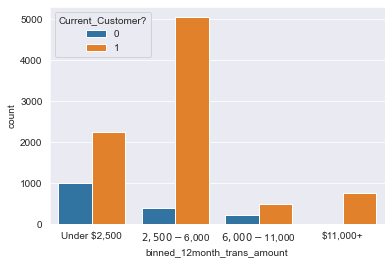

In [52]:
sns.countplot(df['binned_12month_trans_amount'], hue=df['Current_Customer?'])

Observation:
* 2,500 - 6,000 is definitely the most popular spending/transaction range
* Business Recommendation: The different Types of Cards (i.e. Card_Category) should be tailored in perks for each spending group (e.g. rewards points, etc.)

In [53]:
numeric_columns

['Customer_Age',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

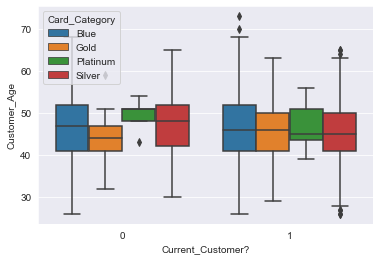

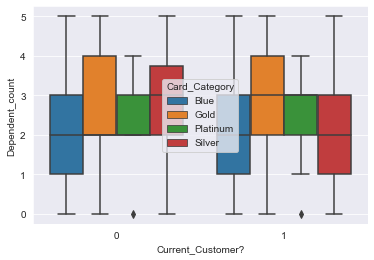

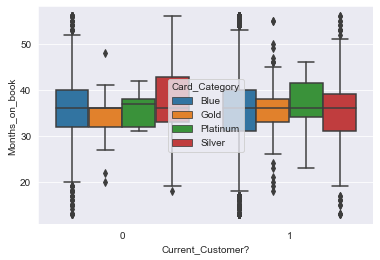

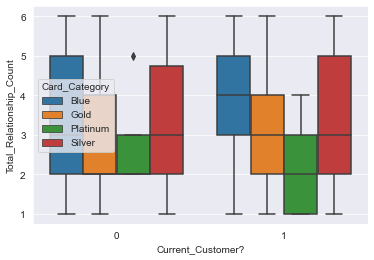

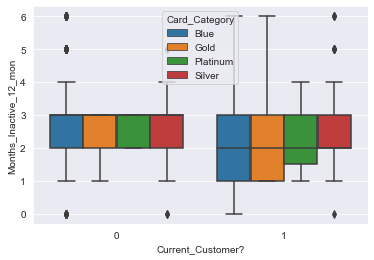

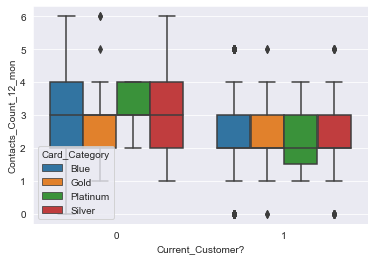

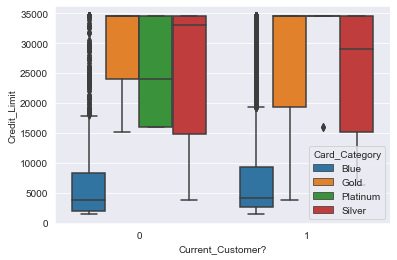

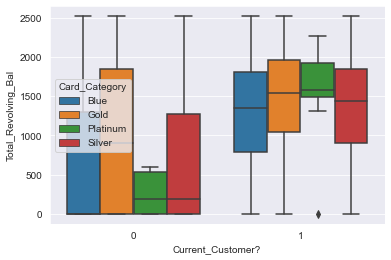

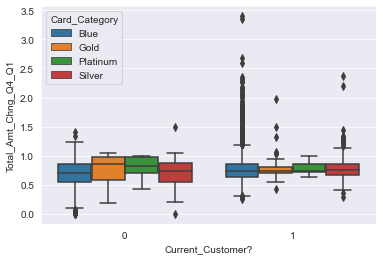

In [54]:
for ea in numeric_columns[0:9]: # using index because error was thrown on 'Total_Trans_Amt'
    plt.figure()
    sns.boxplot(y = df[ea], x = df['Current_Customer?'],hue=df['Card_Category'])

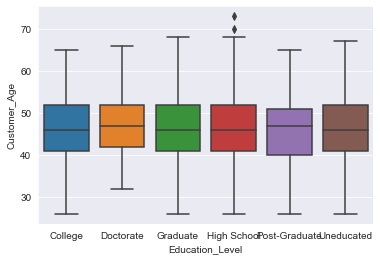

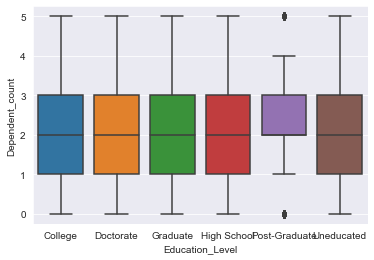

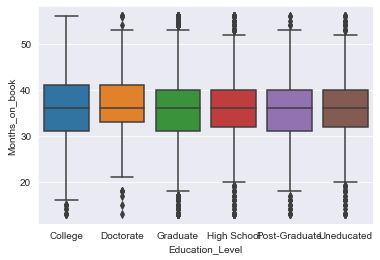

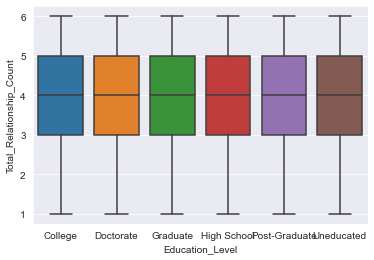

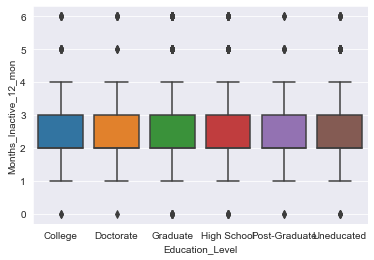

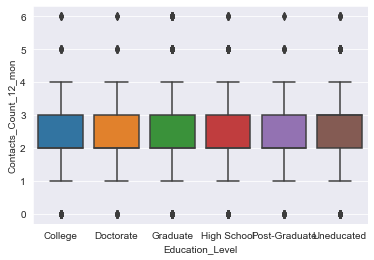

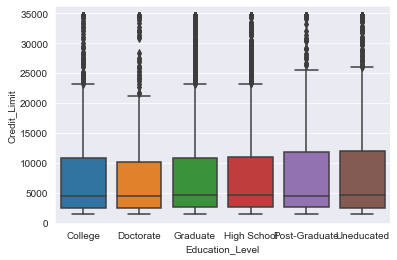

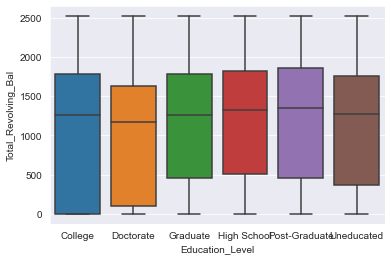

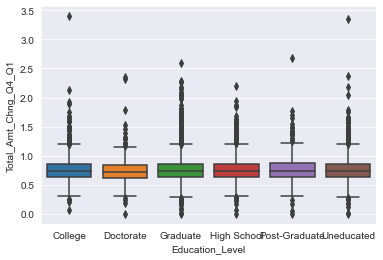

In [55]:
for ea in numeric_columns[0:9]: # using index because error was thrown on 'Total_Trans_Amt'
    plt.figure()
    sns.boxplot(y = df[ea], x = df['Education_Level'])#,hue=df['Card_Category'])

# sns.boxplot(df['Education_Level'], df['Credit_Limit'])

In [56]:
df['binned_age'] = pd.cut(df['Customer_Age'], [25,35,45,55,65,75], labels=['Under 35','35-45','45-55','55-65','65+'])
df.drop(['Customer_Age'], axis=1, inplace=True)
df['binned_age'].value_counts(dropna=False)

45-55       4135
35-45       3742
55-65       1321
Under 35     919
65+           10
Name: binned_age, dtype: int64

<AxesSubplot:xlabel='binned_12month_trans_amount', ylabel='count'>

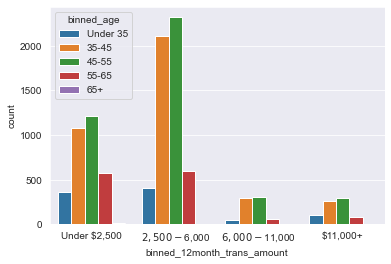

In [57]:
sns.countplot(df['binned_12month_trans_amount'], hue=df['binned_age'])

Above - binned 'Customer_Age' and dropped old columns
* majority age groups would be the combined 35-55

<AxesSubplot:xlabel='binned_age', ylabel='count'>

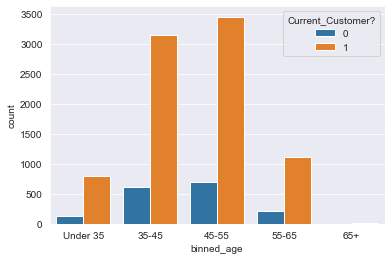

In [58]:
sns.countplot(df['binned_age'],hue=df['Current_Customer?'])

Observation:
* 35-55 most popular age range 
* Recommendation: Need more incentives for younger (<35) and older (65+)

ACTION: Consider using a stacked_plot approach - as shown in 'Practice_Excercise_Week1'
- located in Model Tuning - Logistic Regression SMOTE Example
- Change column to df[current_customer?]

<AxesSubplot:xlabel='Months_on_book', ylabel='count'>

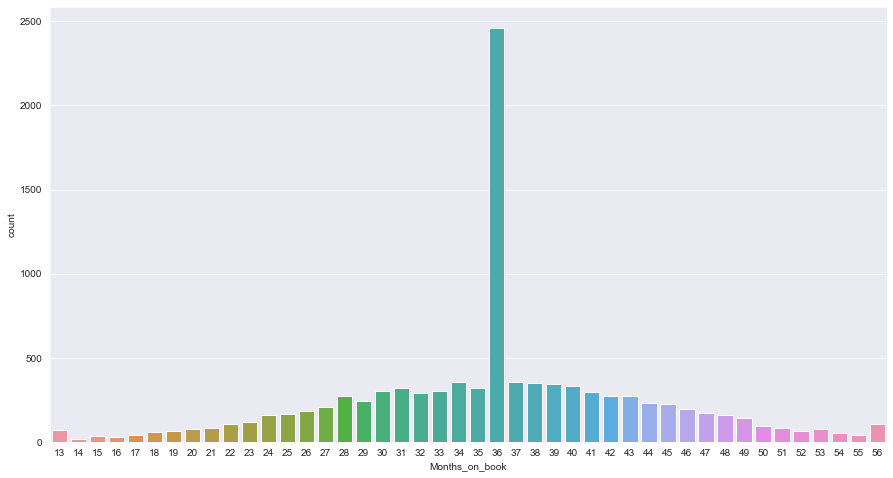

In [59]:
plt.figure(figsize=(15,8))
sns.countplot(df['Months_on_book'])

In [26]:
df['binned_months_on_book'] = pd.cut(df['Months_on_book'], [10, 20, 30, 40, 50, 60], labels=['Under 20','20-30','30-40','40-50','50+'])
df.drop(['Months_on_book'], axis=1, inplace=True)
df['binned_months_on_book'].value_counts(dropna=False)

30-40       5424
40-50       2065
20-30       1837
50+          418
Under 20     383
Name: binned_months_on_book, dtype: int64

Above - Binned 'Months_on_book' column
* Majority group: 30-40

In [61]:
df.describe()

Dependent_count  Total_Relationship_Count  Months_Inactive_12_mon  \
count     10127.000000              10127.000000            10127.000000   
mean          2.346203                  3.812580                2.341167   
std           1.298908                  1.554408                1.010622   
min           0.000000                  1.000000                0.000000   
25%           1.000000                  3.000000                2.000000   
50%           2.000000                  4.000000                2.000000   
75%           3.000000                  5.000000                3.000000   
max           5.000000                  6.000000                6.000000   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count           10127.000000  10127.000000         10127.000000   
mean                2.455317   8631.953698          1162.814061   
std                 1.106225   9088.776650           814.987335   
min                 0.000000   1438.300000             0.000000   
25%                 2.000000   2555.000000           359.000000   
50%                 2.000000   4549.000000          1276.000000   
75%                 3.000000  11067.500000          1784.000000   
max                 6.000000  34516.000000          2517.000000   

       Total_Amt_Chng_Q4_Q1  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
count          10127.000000    10127.000000         10127.000000   
mean               0.759941       64.858695             0.712222   
std                0.219207       23.472570             0.238086   
min                0.000000       10.000000             0.000000   
25%                0.631000       45.000000             0.582000   
50%                0.736000       67.000000             0.702000   
75%                0.859000       81.000000             0.818000   
max                3.397000      139.000000             3.714000   

       Avg_Utilization_Ratio  
count           10127.000000  
mean                0.274894  
std                 0.275691  
min                 0.000000  
25%                 0.023000  
50%                 0.176000  
75%                 0.503000  
max                 0.999000

In [27]:
df['binned_revolving_bal'] = pd.cut(df['Total_Revolving_Bal'], [-1,500,1000,1500,2000,2500,3000], labels=['<500','500-1000','1000-1500','1500-2000','2000-2500','2500+'])
df.drop(['Total_Revolving_Bal'], axis=1, inplace=True)
df['binned_revolving_bal'].value_counts(dropna=False)

<500         2596
1500-2000    2291
1000-1500    2258
500-1000     1317
2000-2500    1136
2500+         529
Name: binned_revolving_bal, dtype: int64

<AxesSubplot:xlabel='binned_months_on_book', ylabel='count'>

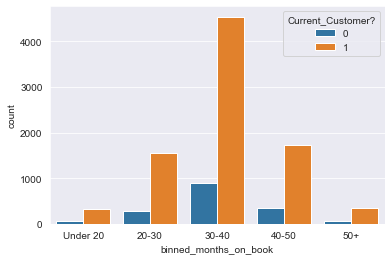

In [63]:
sns.countplot(df['binned_months_on_book'], hue=df['Current_Customer?'])

<AxesSubplot:xlabel='Education_Level', ylabel='count'>

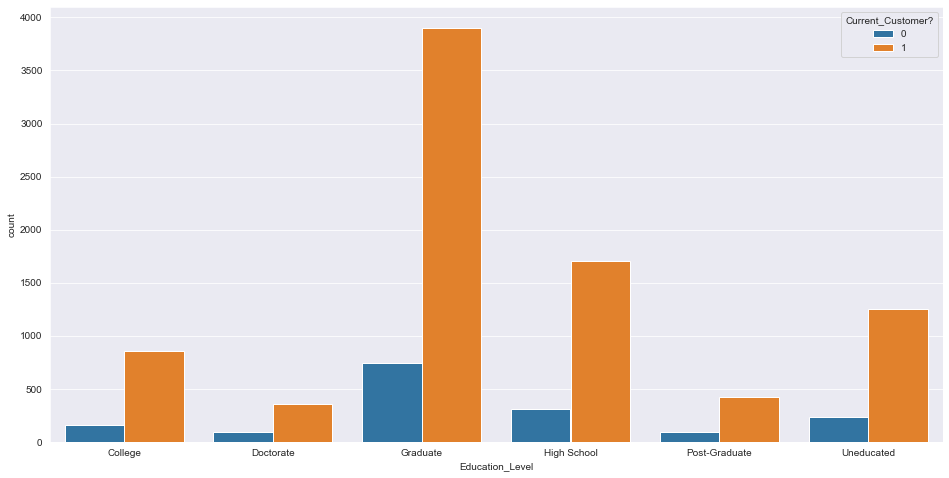

In [64]:
plt.figure(figsize=(16,8))
sns.countplot(df['Education_Level'], hue=df['Current_Customer?'])

Observations:
* Graduate is the most popular category 
* Doctorate and post-graduate are the least popular groups - RECOMMENDATION: Increase incentives in these classes

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

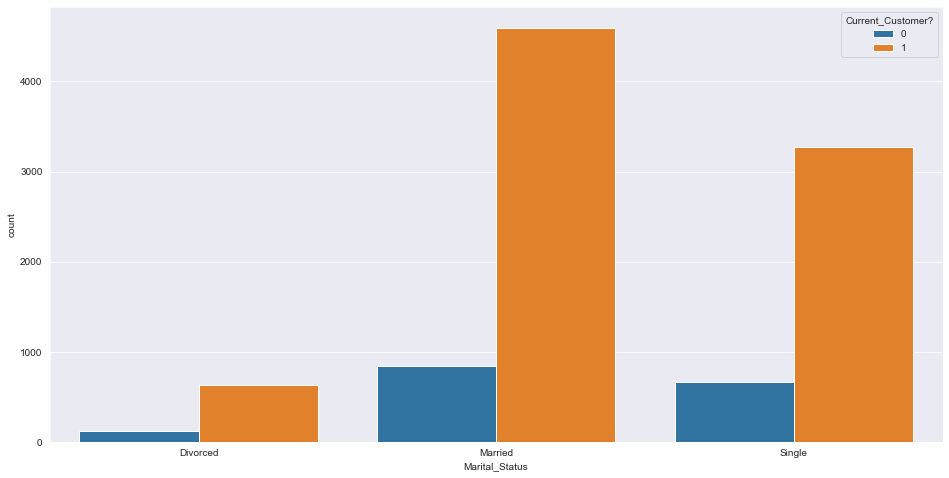

In [65]:
plt.figure(figsize=(16,8))
sns.countplot(df['Marital_Status'], hue=df['Current_Customer?'])

Observation
* Divorced is the least popular group - RECOMMENDATION: Increase incentives in these classes

<AxesSubplot:xlabel='Dependent_count', ylabel='count'>

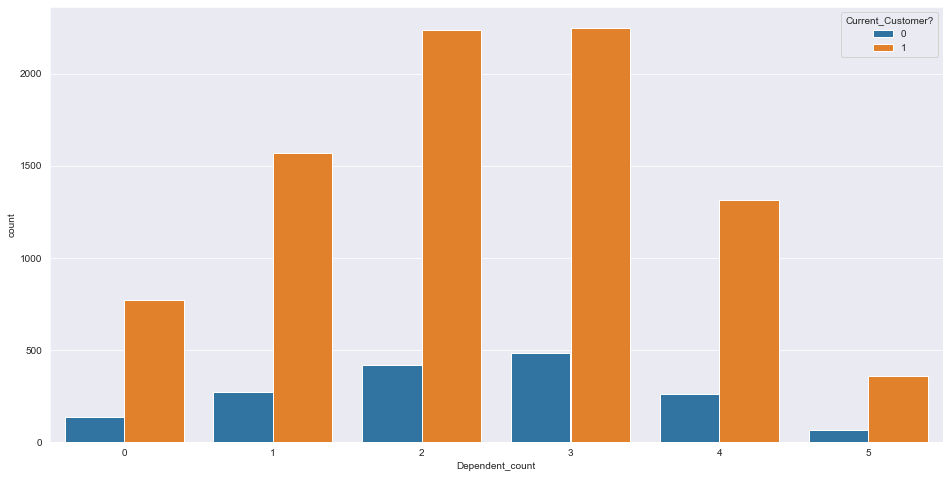

In [66]:
plt.figure(figsize=(16,8))
sns.countplot(df['Dependent_count'], hue=df['Current_Customer?'])

In [67]:
df.columns

Index(['Gender', 'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Total_Relationship_Count',
       'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit',
       'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1',
       'Avg_Utilization_Ratio', 'Current_Customer?',
       'binned_12month_trans_amount', 'binned_age', 'binned_months_on_book',
       'binned_revolving_bal'],
      dtype='object')

<AxesSubplot:xlabel='binned_revolving_bal', ylabel='count'>

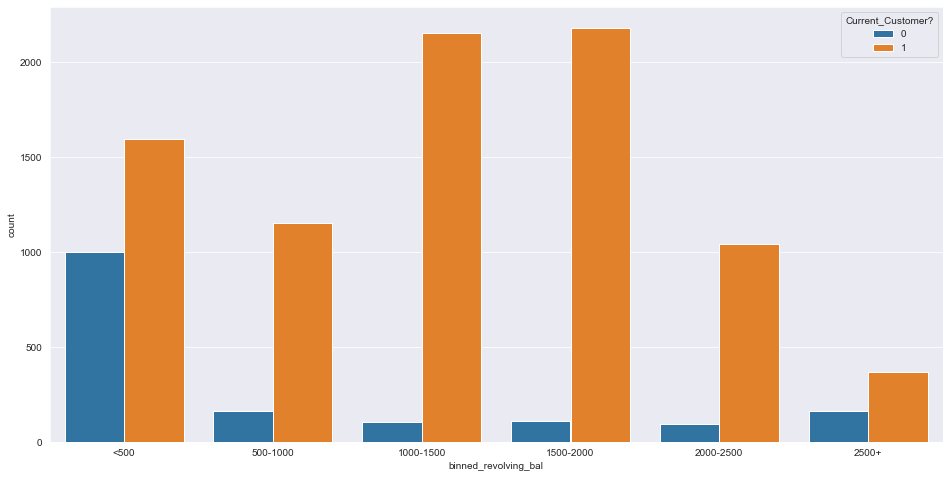

In [68]:
plt.figure(figsize=(16,8))
sns.countplot(df['binned_revolving_bal'], hue=df['Current_Customer?'])

Observation:
* <500 has the highest percentage of non-customers
* Recommendation: Increase incentives to get a balance over 500, then customers will be more likely to stay 
* ACTION: deep dive into <500 previous customers to try and identify a trend

In [69]:
df.head()

Gender  Dependent_count Education_Level Marital_Status Income_Category  \
0      M                3     High School        Married     $60K - $80K   
1      F                5        Graduate         Single  Less than $40K   
2      M                3        Graduate        Married    $80K - $120K   
3      F                4     High School        Married  Less than $40K   
4      M                3      Uneducated        Married     $60K - $80K   

  Card_Category  Total_Relationship_Count  Months_Inactive_12_mon  \
0          Blue                         5                       1   
1          Blue                         6                       1   
2          Blue                         4                       1   
3          Blue                         3                       4   
4          Blue                         5                       1   

   Contacts_Count_12_mon  Credit_Limit  Total_Amt_Chng_Q4_Q1  Total_Trans_Ct  \
0                      3       12691.0                 1.335              42   
1                      2        8256.0                 1.541              33   
2                      0        3418.0                 2.594              20   
3                      1        3313.0                 1.405              20   
4                      0        4716.0                 2.175              28   

   Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio Current_Customer?  \
0                1.625                  0.061                 1   
1                3.714                  0.105                 1   
2                2.333                  0.000                 1   
3                2.333                  0.760                 1   
4                2.500                  0.000                 1   

  binned_12month_trans_amount binned_age binned_months_on_book  \
0                Under $2,500      35-45                 30-40   
1                Under $2,500      45-55                 40-50   
2                Under $2,500      45-55                 30-40   
3                Under $2,500      35-45                 30-40   
4                Under $2,500      35-45                 20-30   

  binned_revolving_bal  
0             500-1000  
1             500-1000  
2                 <500  
3                2500+  
4                 <500

In [70]:
df_under500 = df[df['binned_revolving_bal']=='<500']

In [71]:
df_no_longer_customer = df[df['Current_Customer?']==0]

In [72]:
df_no_longer_customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1627 entries, 21 to 10126
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Gender                       1627 non-null   category
 1   Dependent_count              1627 non-null   int64   
 2   Education_Level              1627 non-null   category
 3   Marital_Status               1627 non-null   category
 4   Income_Category              1627 non-null   category
 5   Card_Category                1627 non-null   category
 6   Total_Relationship_Count     1627 non-null   int64   
 7   Months_Inactive_12_mon       1627 non-null   int64   
 8   Contacts_Count_12_mon        1627 non-null   int64   
 9   Credit_Limit                 1627 non-null   float64 
 10  Total_Amt_Chng_Q4_Q1         1627 non-null   float64 
 11  Total_Trans_Ct               1627 non-null   int64   
 12  Total_Ct_Chng_Q4_Q1          1627 non-null   float64 
 13  A

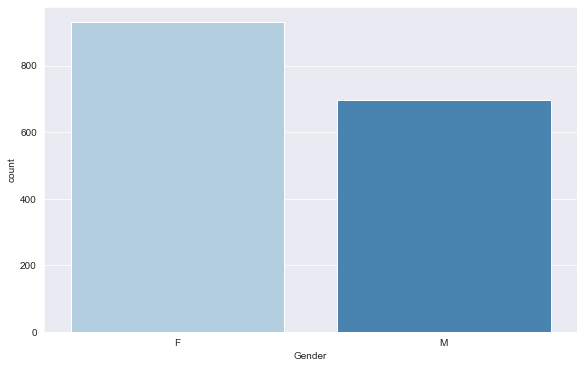

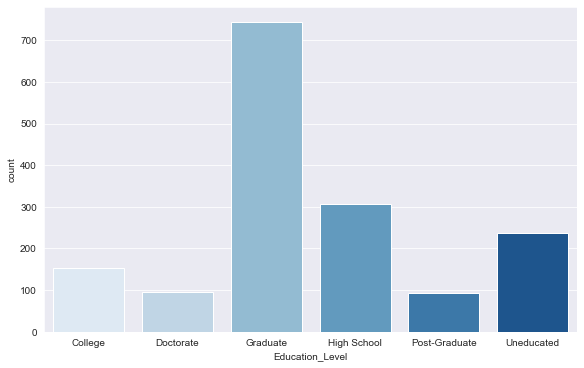

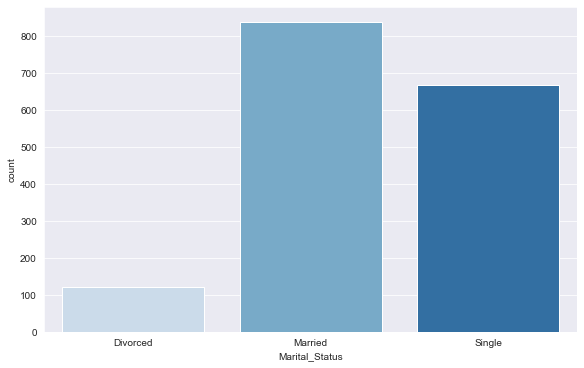

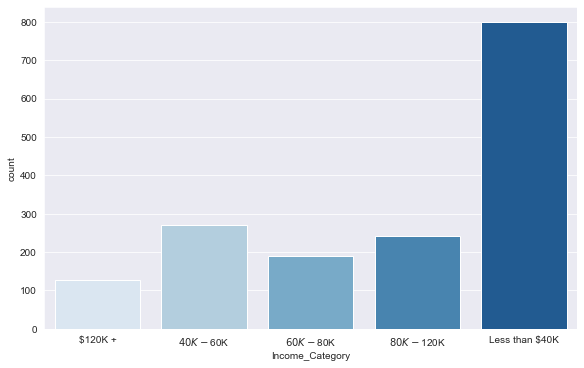

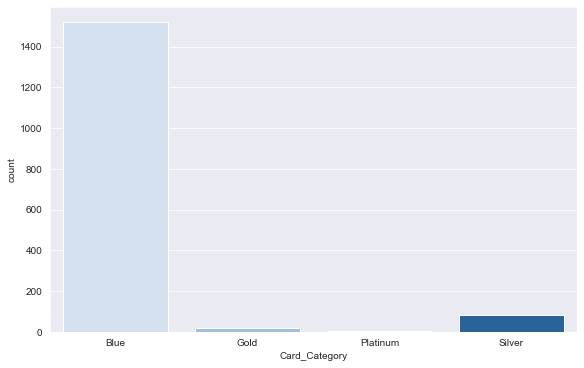

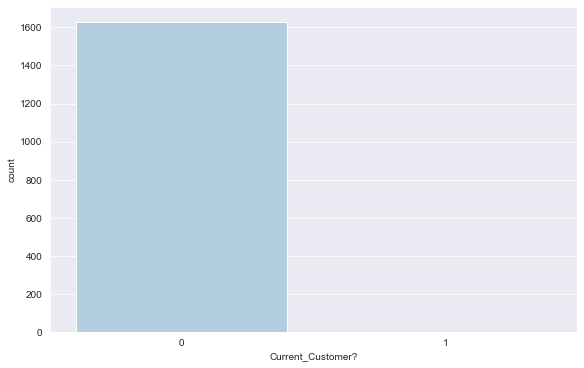

In [73]:
# running a loop through each categorical column and plotting a countplot
# this is for only the 'previous customer group'
for ea in category_columns:
    plt.figure(figsize=(8,5), constrained_layout=True) #change size and constrained_layout True due to overlapping x-axis label
    sns.set_style("darkgrid")
    sns.countplot(df_no_longer_customer[ea], palette='Blues')

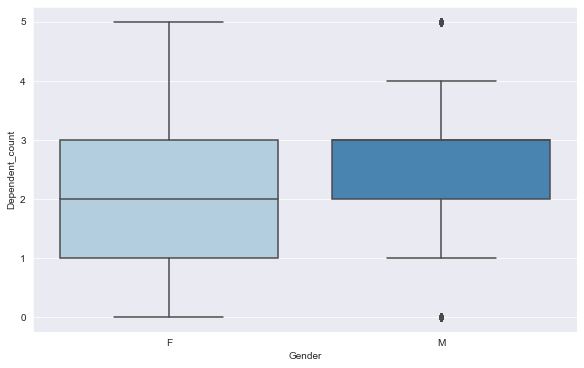

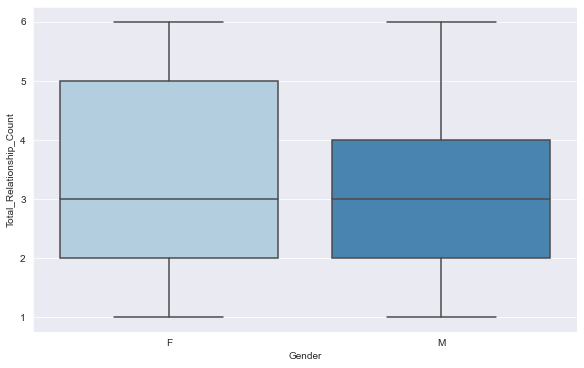

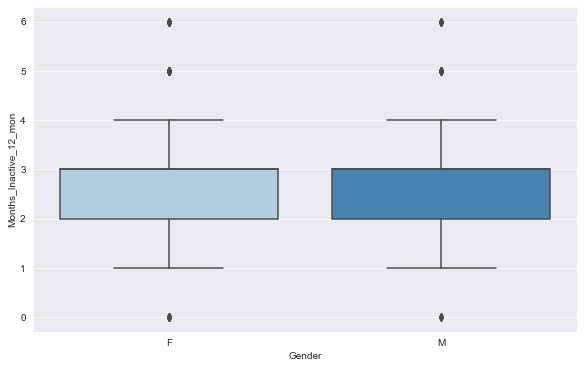

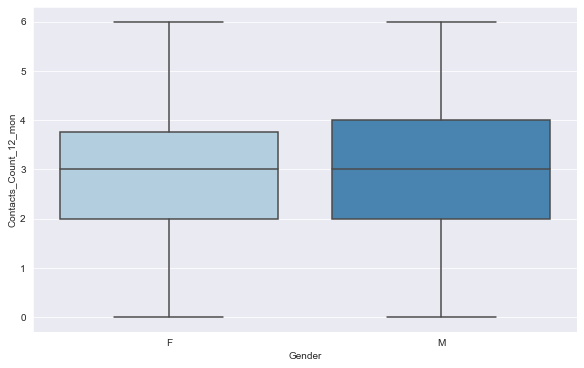

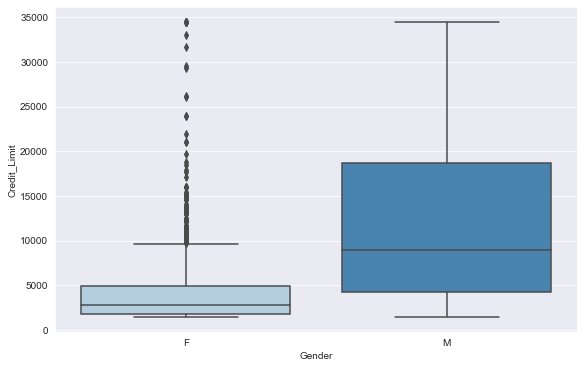

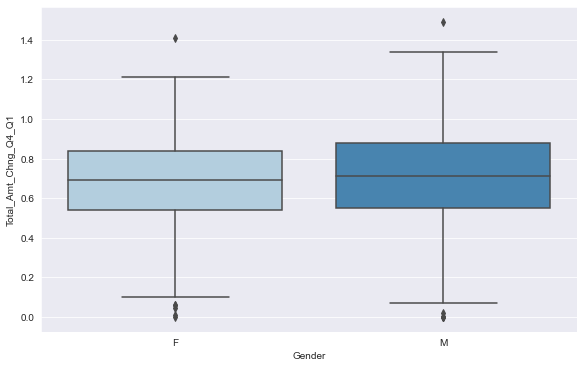

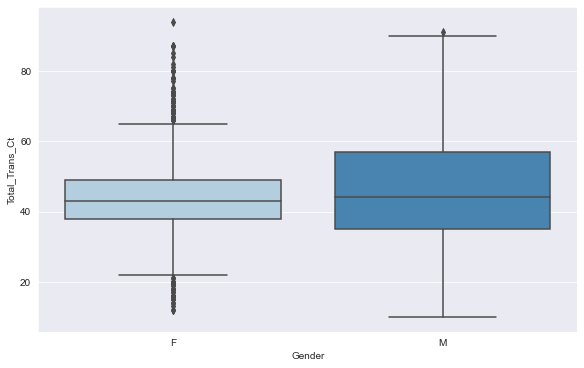

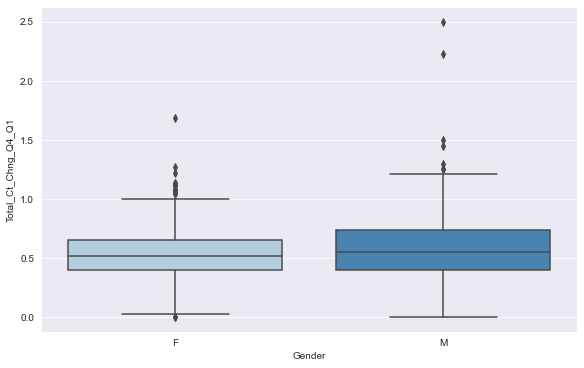

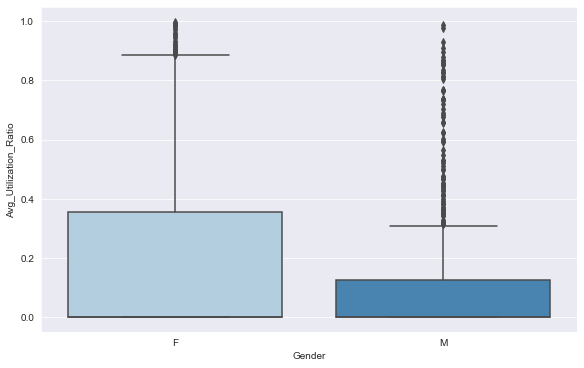

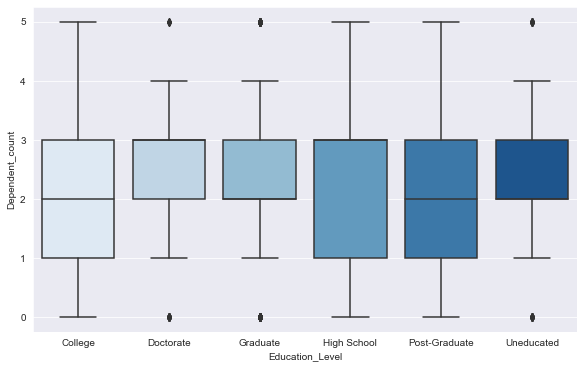

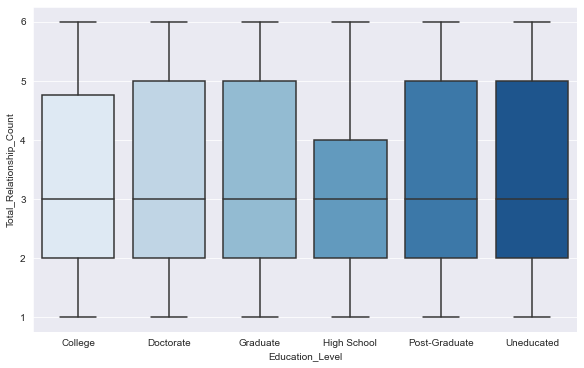

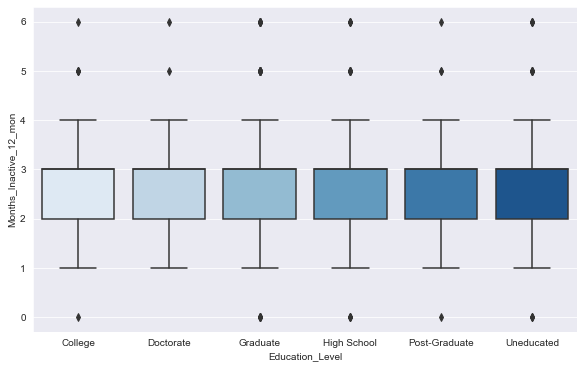

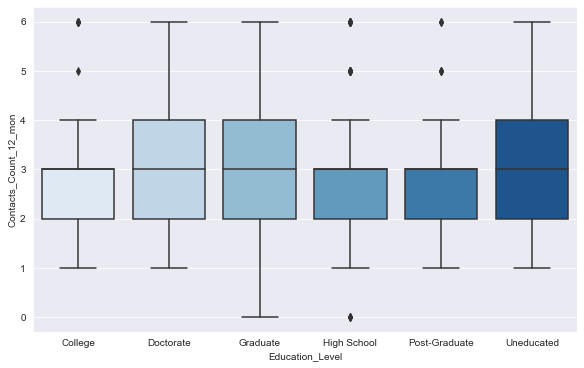

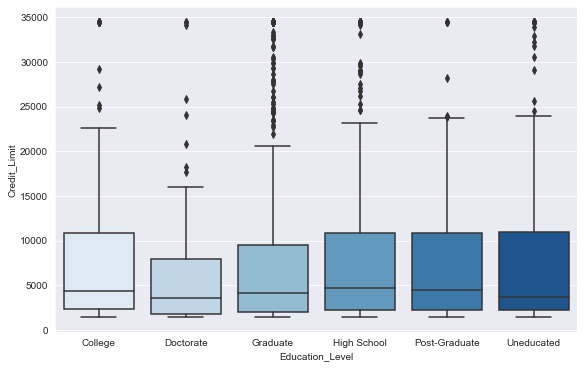

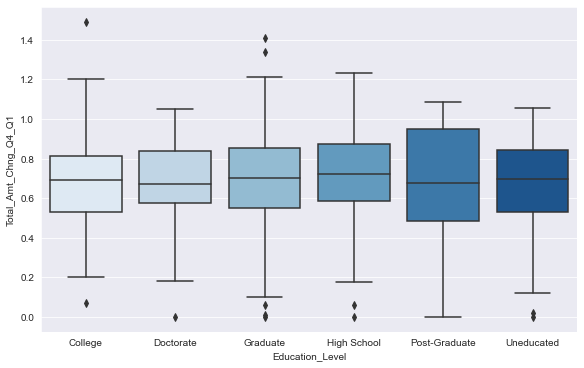

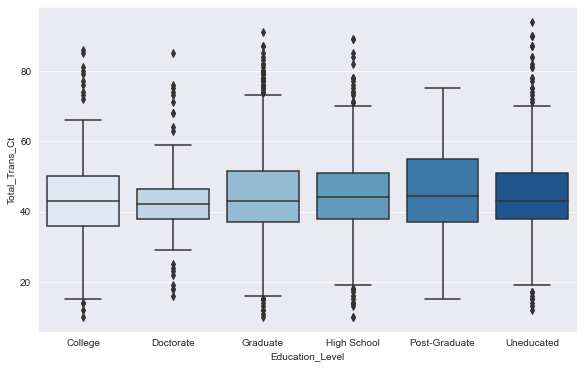

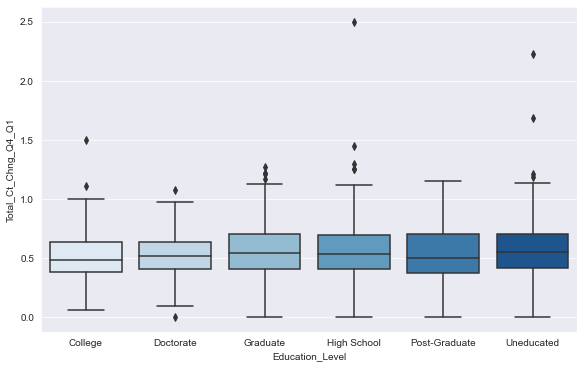

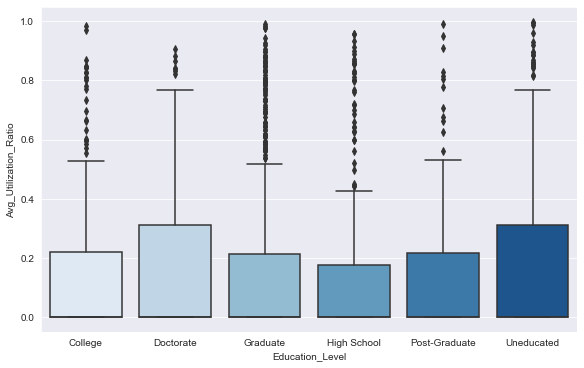

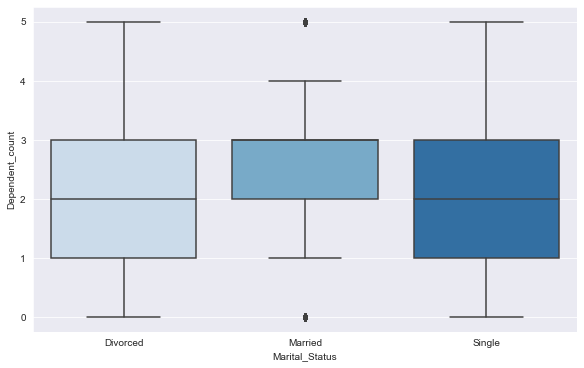

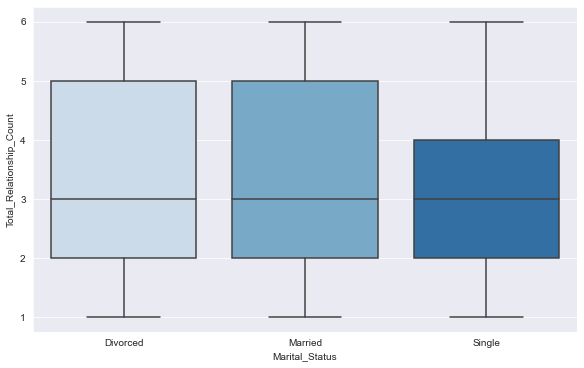

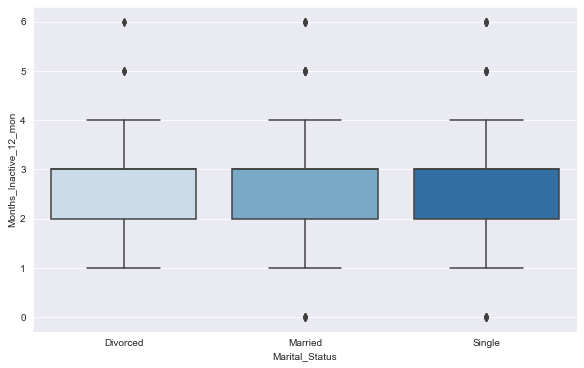

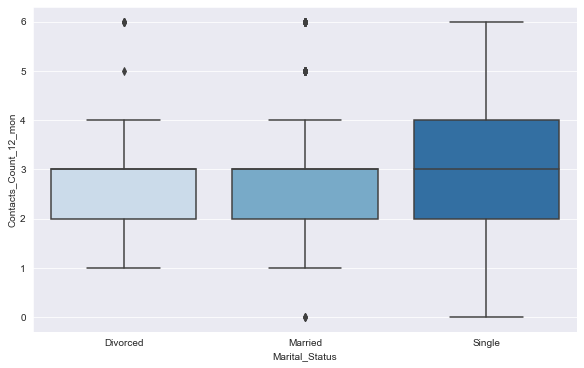

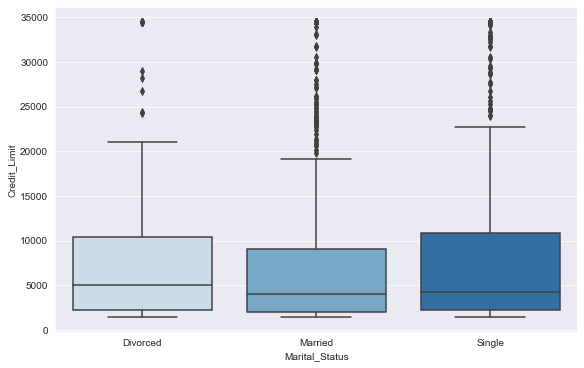

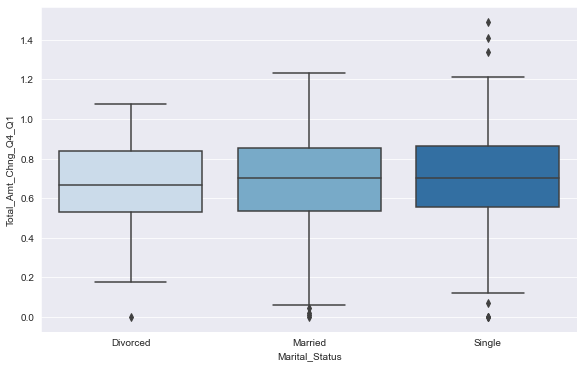

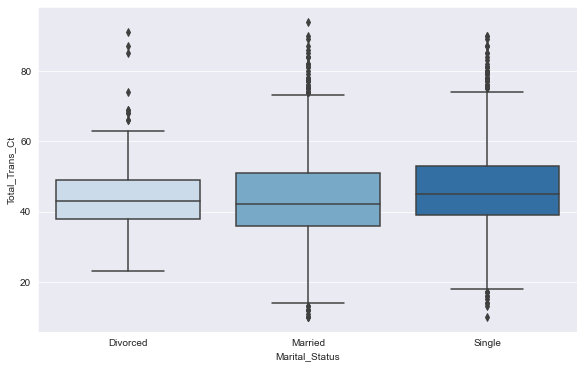

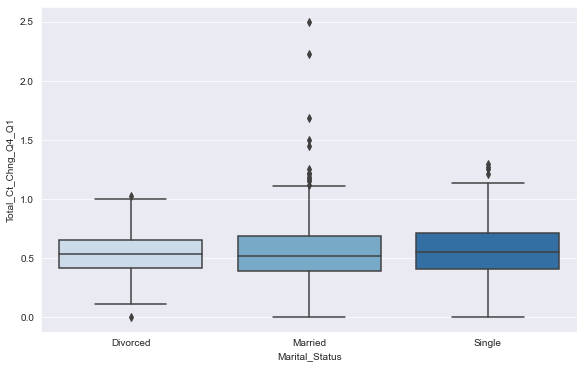

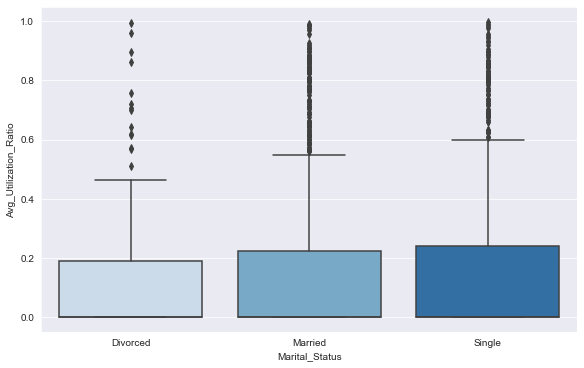

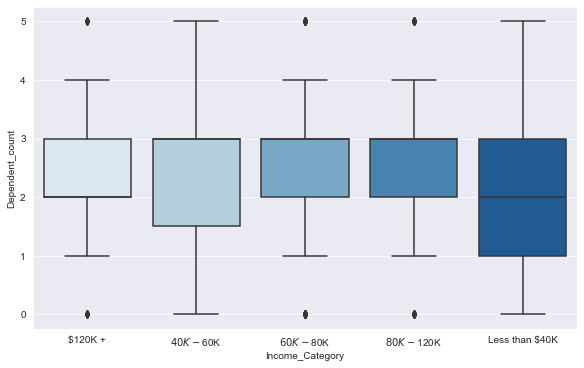

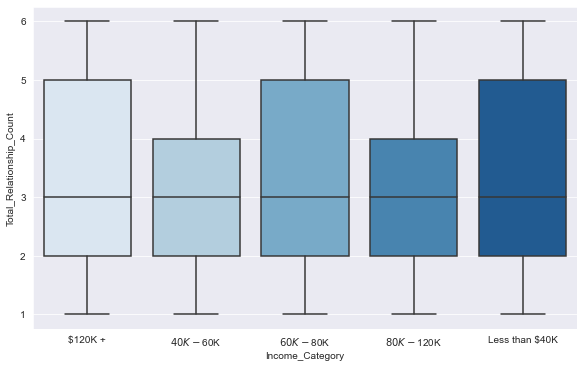

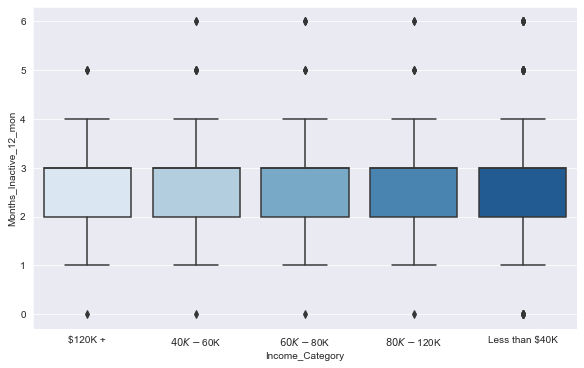

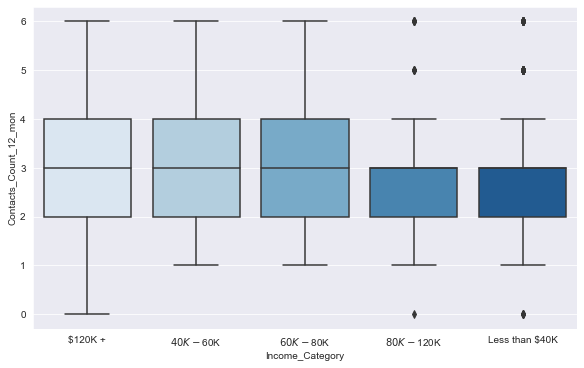

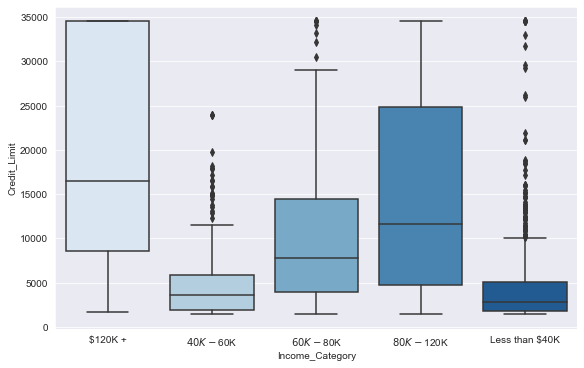

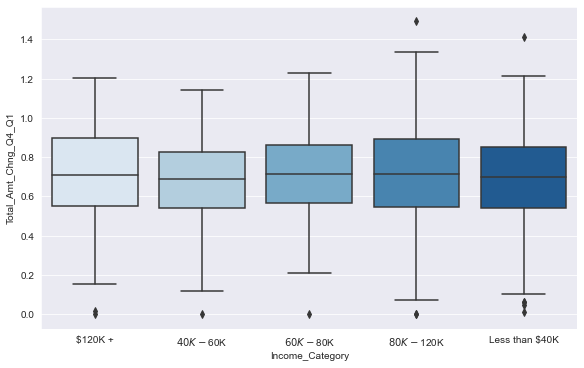

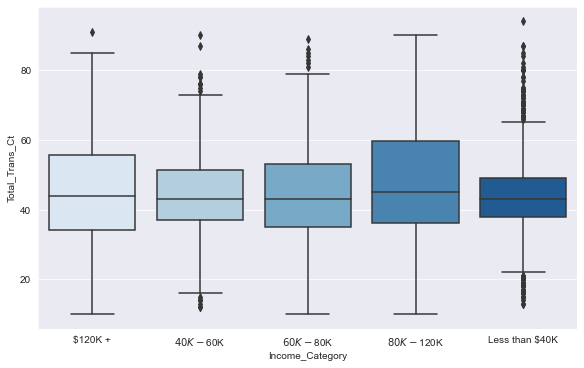

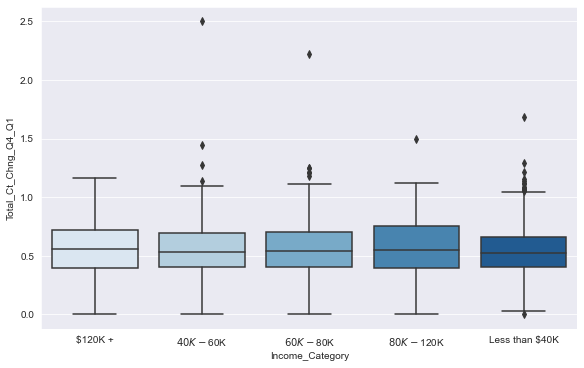

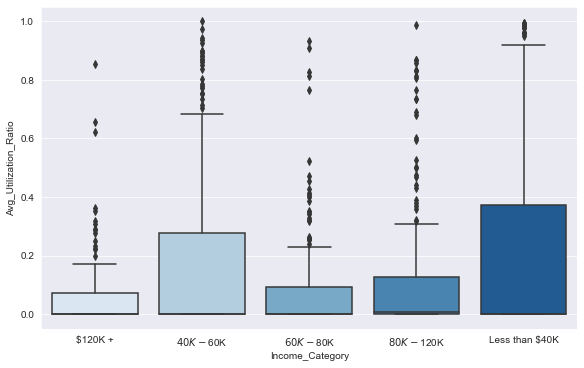

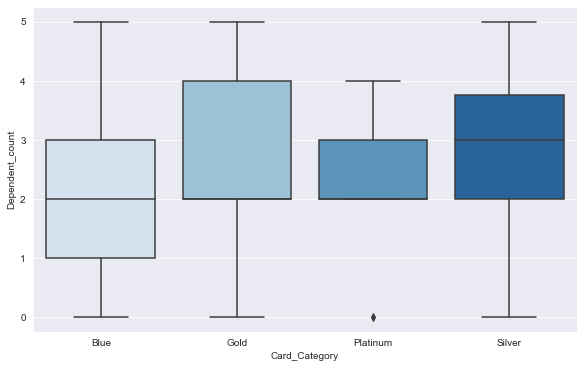

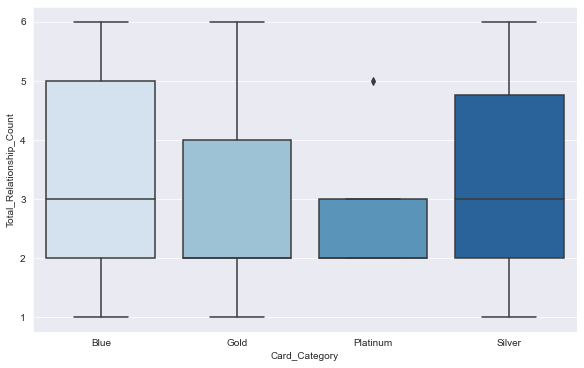

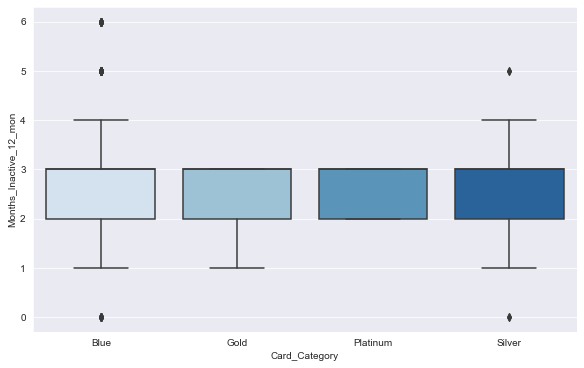

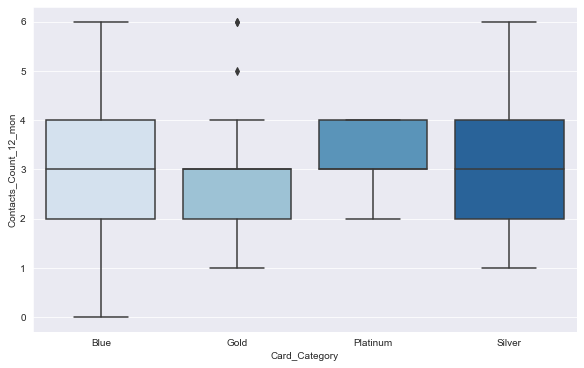

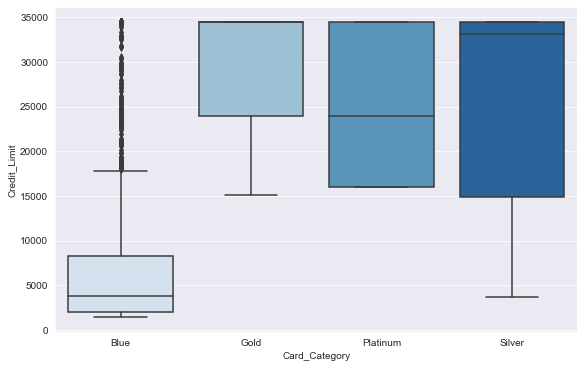

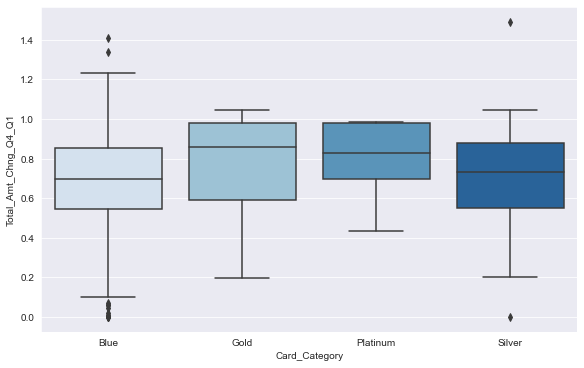

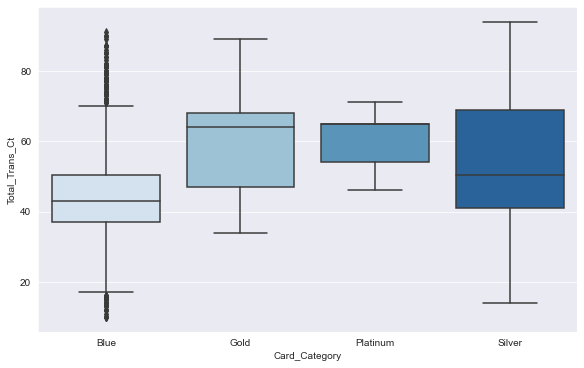

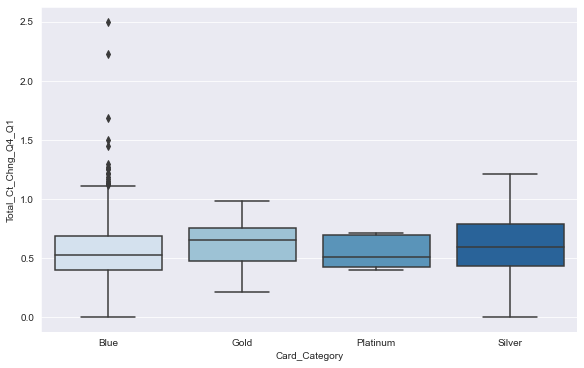

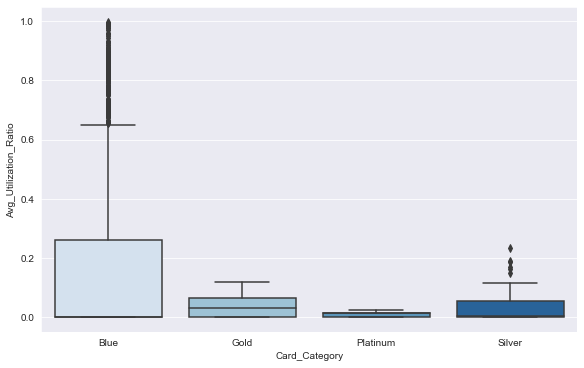

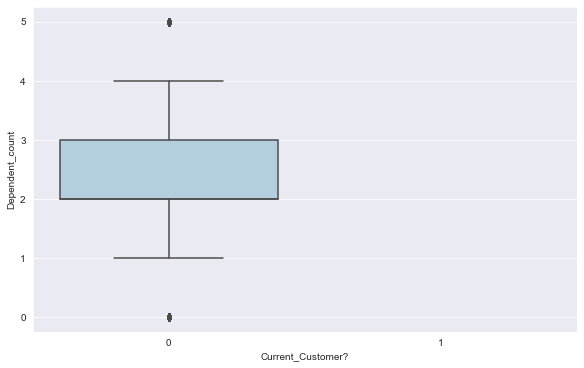

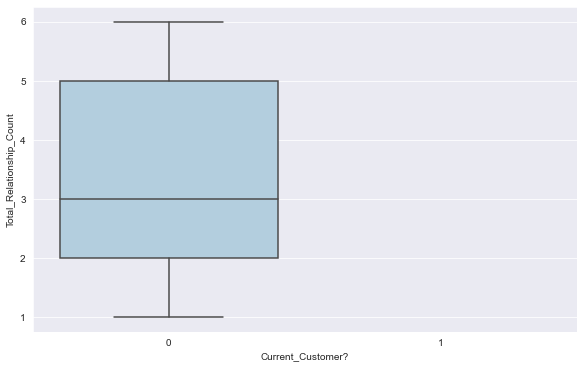

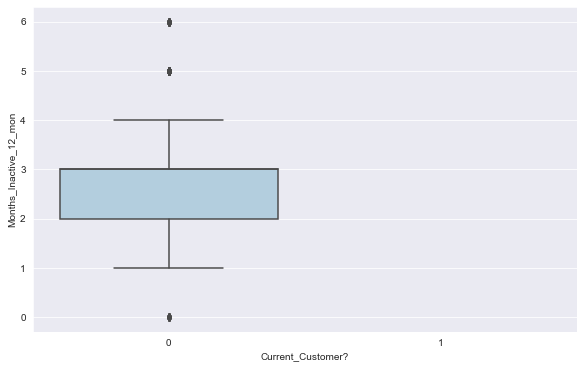

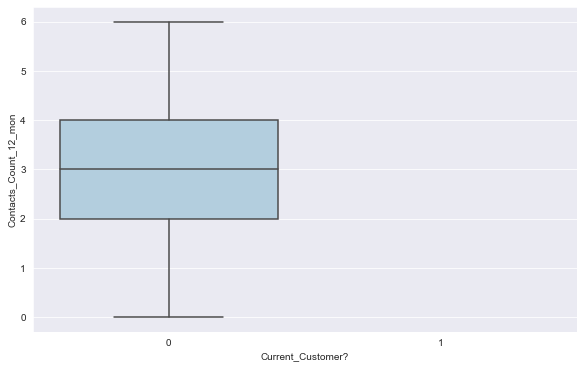

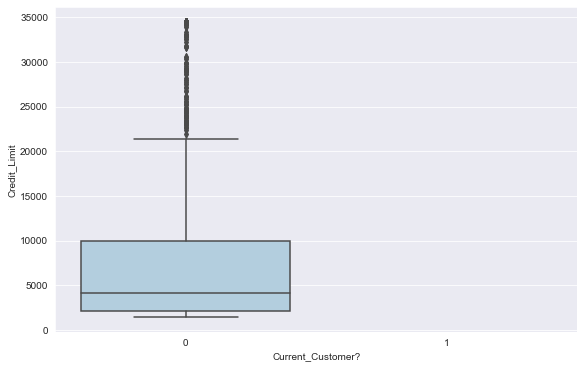

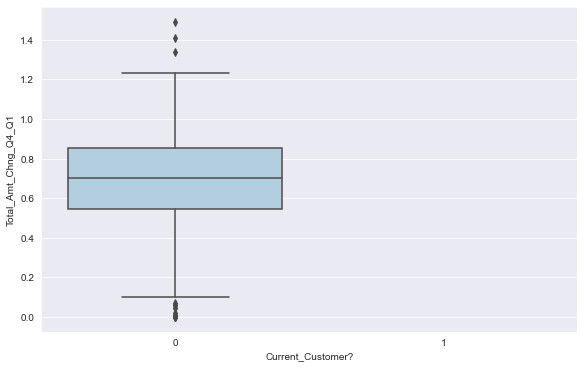

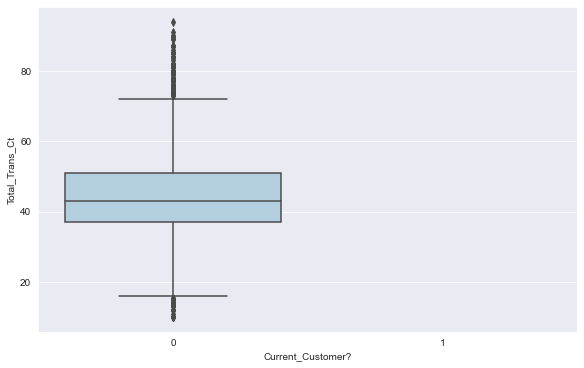

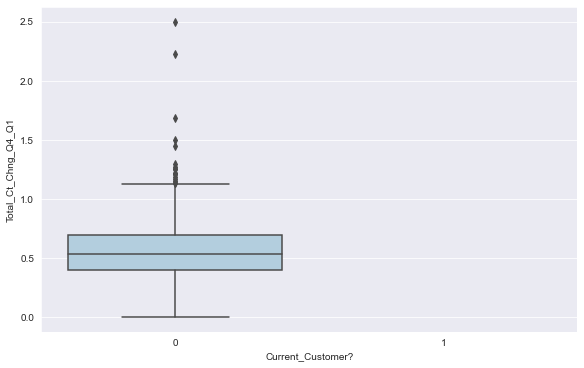

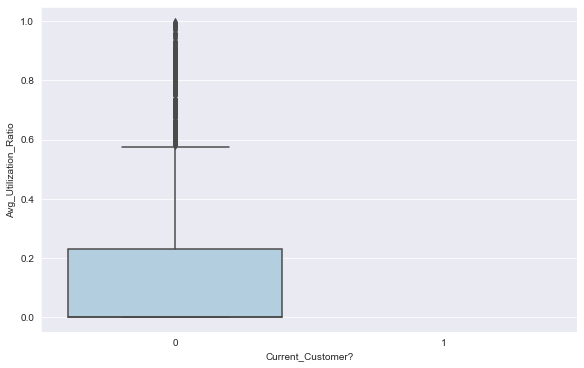

In [74]:
for ea in category_columns:
    for each in df_no_longer_customer.describe().columns: # each numerical column
        plt.figure(figsize=(8,5), constrained_layout=True) #change size and constrained_layout True due to overlapping x-axis label
        sns.set_style("darkgrid")
        sns.boxplot(df_no_longer_customer[ea], df_no_longer_customer[each],palette='Blues')

Observation: 
* Majority of females had lower Credit_Limit values (<5,000) - Recommendation: Offer increased credit limits 
* 

In [75]:
df_under500.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2596 entries, 2 to 10125
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Gender                       2596 non-null   category
 1   Dependent_count              2596 non-null   int64   
 2   Education_Level              2596 non-null   category
 3   Marital_Status               2596 non-null   category
 4   Income_Category              2596 non-null   category
 5   Card_Category                2596 non-null   category
 6   Total_Relationship_Count     2596 non-null   int64   
 7   Months_Inactive_12_mon       2596 non-null   int64   
 8   Contacts_Count_12_mon        2596 non-null   int64   
 9   Credit_Limit                 2596 non-null   float64 
 10  Total_Amt_Chng_Q4_Q1         2596 non-null   float64 
 11  Total_Trans_Ct               2596 non-null   int64   
 12  Total_Ct_Chng_Q4_Q1          2596 non-null   float64 
 13  Av

In [76]:
df_under500.describe()

Dependent_count  Total_Relationship_Count  Months_Inactive_12_mon  \
count      2596.000000               2596.000000             2596.000000   
mean          2.350924                  3.726888                2.433744   
std           1.291040                  1.543881                1.016171   
min           0.000000                  1.000000                0.000000   
25%           1.000000                  3.000000                2.000000   
50%           2.000000                  4.000000                2.000000   
75%           3.000000                  5.000000                3.000000   
max           5.000000                  6.000000                6.000000   

       Contacts_Count_12_mon  Credit_Limit  Total_Amt_Chng_Q4_Q1  \
count            2596.000000   2596.000000           2596.000000   
mean                2.601310   8061.902196              0.734603   
std                 1.143357   8914.925191              0.208317   
min                 0.000000   1438.300000              0.000000   
25%                 2.000000   1853.750000              0.611000   
50%                 3.000000   4187.000000              0.726000   
75%                 3.000000  10530.000000              0.848250   
max                 6.000000  34516.000000              3.397000   

       Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
count     2596.000000          2596.000000            2596.000000  
mean        60.855547             0.668505               0.005497  
std         22.071899             0.234876               0.032342  
min         10.000000             0.000000               0.000000  
25%         43.000000             0.524750               0.000000  
50%         62.000000             0.667000               0.000000  
75%         77.000000             0.795000               0.000000  
max        132.000000             3.250000               0.344000

In [77]:
# sns.pairplot(df_under500)

# Split DATA - One Hot Encoding

In [28]:
# split data
x = df.drop(['Current_Customer?'], axis=1)
y = df['Current_Customer?']

In [29]:
# split virgin dataset
x_model = df_model.drop(['Attrition_Flag'], axis=1)
y_model = df_model['Attrition_Flag']

In [30]:
# one hot encoding
x = pd.get_dummies(x, drop_first=True)
x.head()

Customer_Age  Dependent_count  Total_Relationship_Count  \
0            45                3                         5   
1            49                5                         6   
2            51                3                         4   
3            40                4                         3   
4            40                3                         5   

   Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
0                       1                      3       12691.0   
1                       1                      2        8256.0   
2                       1                      0        3418.0   
3                       4                      1        3313.0   
4                       1                      0        4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   ...  Card_Category_Silver  binned_months_on_book_20-30  \
0  ...                     0                            0   
1  ...                     0                            0   
2  ...                     0                            0   
3  ...                     0                            0   
4  ...                     0                            1   

   binned_months_on_book_30-40  binned_months_on_book_40-50  \
0                            1                            0   
1                            0                            1   
2                            1                            0   
3                            1                            0   
4                            0                            0   

   binned_months_on_book_50+  binned_revolving_bal_500-1000  \
0                          0                              1   
1                          0                              1   
2                          0                              0   
3                          0                              0   
4                          0                              0   

   binned_revolving_bal_1000-1500  binned_revolving_bal_1500-2000  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   binned_revolving_bal_2000-2500  binned_revolving_bal_2500+  
0                               0                           0  
1                               0                           0  
2                               0                           0  
3                               0                           1  
4                               0                           0  

[5 rows x 35 columns]

In [134]:
x_model = pd.get_dummies(x_model, drop_first=True)
x_model.head()

Customer_Age  Dependent_count  Months_on_book  Total_Relationship_Count  \
0            45                3              39                         5   
1            49                5              44                         6   
2            51                3              36                         4   
3            40                4              34                         3   
4            40                3              21                         5   

   Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
0                       1                      3       12691.0   
1                       1                      2        8256.0   
2                       1                      0        3418.0   
3                       4                      1        3313.0   
4                       1                      0        4716.0   

   Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0                  777          11914.0                 1.335   
1                  864           7392.0                 1.541   
2                    0           3418.0                 2.594   
3                 2517            796.0                 1.405   
4                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0             1144              42                1.625   
1             1291              33                3.714   
2             1887              20                2.333   
3             1171              20                2.333   
4              816              28                2.500   

   Avg_Utilization_Ratio  Gender_M  Education_Level_Doctorate  \
0                  0.061         1                          0   
1                  0.105         0                          0   
2                  0.000         1                          0   
3                  0.760         0                          0   
4                  0.000         1                          0   

   Education_Level_Graduate  Education_Level_High School  \
0                         0                            1   
1                         1                            0   
2                         1                            0   
3                         0                            1   
4                         0                            0   

   Education_Level_Post-Graduate  Education_Level_Uneducated  \
0                              0                           0   
1                              0                           0   
2                              0                           0   
3                              0                           0   
4                              0                           1   

   Education_Level_Unknown  Marital_Status_Married  Marital_Status_Single  \
0                        0                       1                      0   
1                        0                       0                      1   
2                        0                       1                      0   
3                        0                       0                      0   
4                        0                       1                      0   

   Marital_Status_Unknown  Income_Category_$40K - $60K  \
0                       0                            0   
1                       0                            0   
2                       0                            0   
3                       1                            0   
4                       0                            0   

   Income_Category_$60K - $80K  Income_Category_$80K - $120K  \
0                            1                             0   
1                            0                             0   
2                            0                             1   
3                            0                             0   
4                            1                             0   

   Income_Category_Less than $40K  Income_Category_Unknow

In [113]:
x.columns

Index(['Dependent_count', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Amt_Chng_Q4_Q1',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Gender_M', 'Education_Level_Doctorate', 'Education_Level_Graduate',
       'Education_Level_High School', 'Education_Level_Post-Graduate',
       'Education_Level_Uneducated', 'Marital_Status_Married',
       'Marital_Status_Single', 'Income_Category_$40K - $60K',
       'Income_Category_$60K - $80K', 'Income_Category_$80K - $120K',
       'Income_Category_Less than $40K', 'Card_Category_Gold',
       'Card_Category_Platinum', 'Card_Category_Silver',
       'binned_12month_trans_amount_$2,500-$6,000',
       'binned_12month_trans_amount_$6,000-$11,000',
       'binned_12month_trans_amount_$11,000+', 'binned_age_35-45',
       'binned_age_45-55', 'binned_age_55-65', 'binned_age_65+',
       'binned_months_on_book_20-30', 'binned_months_on_book_30-40',
      

In [31]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3 , random_state=7,stratify=y)

* Going back through the processed data - looking at mode for these columns: Marital_Status, Income, Education
* Need to confirm that the 

In [32]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(x_model, y_model, test_size=0.3 , random_state=7,stratify=y)

In [122]:
X_train.shape

(7088, 40)

In [128]:
X_test.shape

(3039, 40)

Results from checking the mode:
* All came back with the same mode in X_train and X_test, so this shouldn't be the issue with Data Leakage

In [81]:
y.value_counts(1)

1    0.83934
0    0.16066
Name: Current_Customer?, dtype: float64

In [82]:
y_train.value_counts(1)

1    0.839306
0    0.160694
Name: Current_Customer?, dtype: float64

In [33]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,train,test,train_y,test_y,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(train)
    pred_test = model.predict(test)
    
    train_acc = model.score(train,train_y)
    test_acc = model.score(test,test_y)
    
    train_recall = metrics.recall_score(train_y,pred_train)
    test_recall = metrics.recall_score(test_y,pred_test)
    
    train_precision = metrics.precision_score(train_y,pred_train)
    test_precision = metrics.precision_score(test_y,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be displayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(train,train_y))
        print("Accuracy on test set : ",model.score(test,test_y))
        print("Recall on training set : ",metrics.recall_score(train_y,pred_train))
        print("Recall on test set : ",metrics.recall_score(test_y,pred_test))
        print("Precision on training set : ",metrics.precision_score(train_y,pred_train))
        print("Precision on test set : ",metrics.precision_score(test_y,pred_test))
    
    return score_list # returning the list with train and test scores

In [34]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [42]:
lr = LogisticRegression(random_state=1)
lr.fit(X_train, y_train)

LogisticRegression(random_state=1)

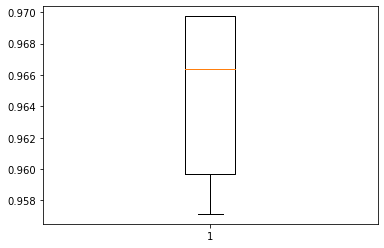

In [43]:
scoring='recall'
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)     #Setting number of splits equal to 5
cv_result_bfr=cross_val_score(estimator=lr, X=X_train, y=y_train, scoring=scoring, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_bfr)
plt.show()

Recall Performance Over 96.5%

Accuracy on training set :  0.8884029345372461
Accuracy on test set :  0.8841724251398486
Recall on training set :  0.9660447133972097
Recall on test set :  0.9615836926695414
Precision on training set :  0.9070391414141414
Precision on test set :  0.9061691909863318


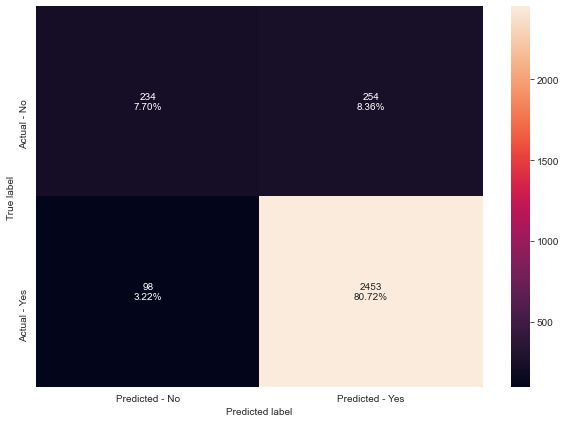

In [87]:
#Calculating different metrics
scores_LR = get_metrics_score(lr,X_train,X_test,y_train,y_test)

# creating confusion matrix
make_confusion_matrix(lr,y_test)

Recall is very good on both sets - Very close together, so we are not overfitting


Oversampling training data - SMOTE

In [88]:
# !pip install imbalanced-learn==0.8.0

In [35]:
from imblearn.over_sampling import SMOTE

In [45]:
print("Before UpSampling, counts of label 'Yes': {}".format(sum(y_train==1)))
print("Before UpSampling, counts of label 'No': {} \n".format(sum(y_train==0)))

sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After UpSampling, counts of label 'Yes': {}".format(sum(y_train_over==1)))
print("After UpSampling, counts of label 'No': {} \n".format(sum(y_train_over==0)))


print('After UpSampling, the shape of train_X: {}'.format(X_train_over.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_over.shape))

Before UpSampling, counts of label 'Yes': 5949
Before UpSampling, counts of label 'No': 1139 

After UpSampling, counts of label 'Yes': 5949
After UpSampling, counts of label 'No': 5949 

After UpSampling, the shape of train_X: (11898, 35)
After UpSampling, the shape of train_y: (11898,) 



In [51]:
log_reg_over = LogisticRegression(random_state = 1)

# Training the basic logistic regression model with training set 
log_reg_over.fit(X_train_over,y_train_over)

LogisticRegression(random_state=1)

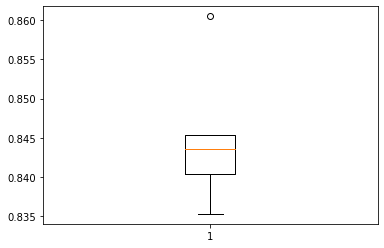

In [52]:
scoring='recall'
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)     #Setting number of splits equal to 5
cv_result_over=cross_val_score(estimator=log_reg_over, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_over)
plt.show()

* Approximately 0.883 recall

Accuracy on training set :  0.8863674567154144
Accuracy on test set :  0.8568608094768015
Recall on training set :  0.911413682971928
Recall on test set :  0.915327322618581
Precision on training set :  0.8679366095725949
Precision on test set :  0.9142521534847299


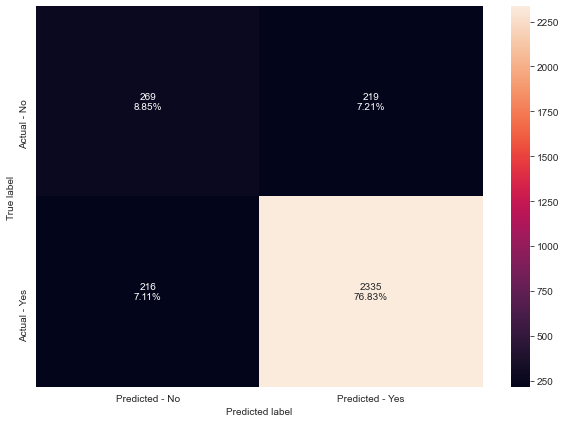

In [93]:
#Calculating different metrics
get_metrics_score(log_reg_over,X_train_over,X_test,y_train_over,y_test)

# creating confusion matrix
make_confusion_matrix(log_reg_over,y_test)

* Decent Recall, but less than initial model 

Regularization

In [46]:
# Choose the type of classifier. 
lr_estimator = LogisticRegression(random_state=1,solver='saga')

# Grid of parameters to choose from
parameters = {'C': np.arange(0.1,1.1,0.1)}

# Run the grid search
grid_obj = GridSearchCV(lr_estimator, parameters, scoring='recall')
grid_obj = grid_obj.fit(X_train_over, y_train_over)

# Set the clf to the best combination of parameters
lr_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
lr_estimator.fit(X_train_over, y_train_over)

LogisticRegression(C=0.1, random_state=1, solver='saga')

Accuracy on training set :  0.5316859976466634
Accuracy on test set :  0.7778874629812438
Recall on training set :  0.8940998487140696
Recall on test set :  0.9000392003136025
Precision on training set :  0.5183705291881883
Precision on test set :  0.845360824742268


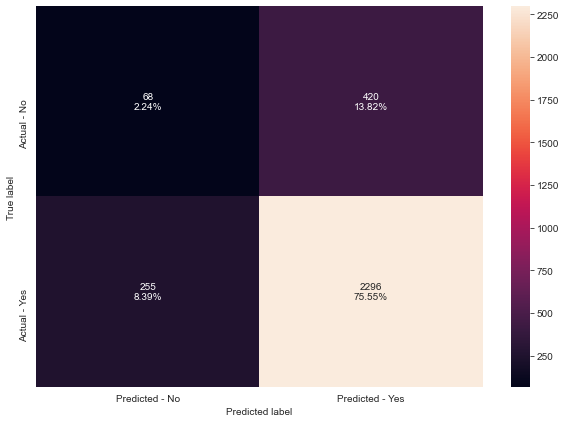

In [95]:
#Calculating different metrics
get_metrics_score(lr_estimator,X_train_over,X_test,y_train_over,y_test)

# creating confusion matrix
make_confusion_matrix(lr_estimator,y_test)

* No improvement with upsampling

Undersampling

In [47]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state = 1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [97]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train==1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train==0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un==1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un==0)))

print('After Under Sampling, the shape of train_X: {}'.format(X_train_un.shape))
print('After Under Sampling, the shape of train_y: {} \n'.format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 5949
Before Under Sampling, counts of label 'No': 1139 

After Under Sampling, counts of label 'Yes': 1139
After Under Sampling, counts of label 'No': 1139 

After Under Sampling, the shape of train_X: (2278, 40)
After Under Sampling, the shape of train_y: (2278,) 



Logistic Regression for undersampled data

In [48]:
log_reg_under = LogisticRegression(random_state = 1)
log_reg_under.fit(X_train_un,y_train_un )

LogisticRegression(random_state=1)

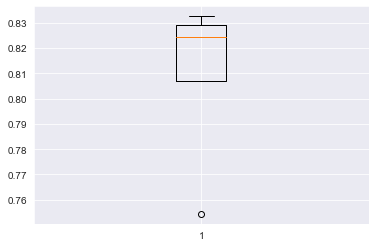

In [99]:
scoring='recall'
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)     #Setting number of splits equal to 5
cv_result_under=cross_val_score(estimator=log_reg_under, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_under)
plt.show()

* between 0.82 and 0.83 performance

Accuracy on training set :  0.8222124670763828
Accuracy on test set :  0.8028956893715038
Recall on training set :  0.7928007023705005
Recall on test set :  0.7992943943551548
Precision on training set :  0.8423507462686567
Precision on test set :  0.9590780809031044


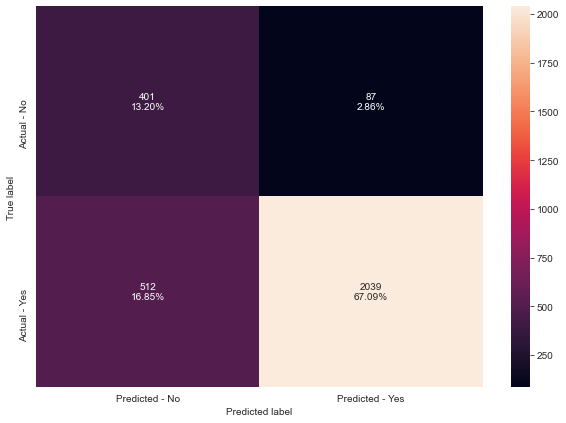

In [100]:
#Calculating different metrics
get_metrics_score(log_reg_under,X_train_un,X_test,y_train_un,y_test)


# creating confusion matrix
make_confusion_matrix(log_reg_under,y_test)

Model is worse after undersampling

In [49]:
# defining list of model
models = [lr]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score(model,X_train,X_test,y_train,y_test,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [53]:
# defining list of models
models = [log_reg_over, lr_estimator]

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score(model,X_train_over,X_test,y_train_over,y_test,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [54]:
# defining list of model
models = [log_reg_under]

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score(model,X_train_un,X_test,y_train_un,y_test,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [55]:
comparison_frame = pd.DataFrame({'Model':['Logistic Regression','Logistic Regression on Oversampled data',
                                          'Logistic Regression-Regularized (Oversampled data)','Logistic Regression on Undersampled data'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test}) 

#Sorting models in decreasing order of test recall
comparison_frame

Model  Train_Accuracy  \
0                                Logistic Regression        0.882901   
1            Logistic Regression on Oversampled data        0.853673   
2  Logistic Regression-Regularized (Oversampled d...        0.544545   
3           Logistic Regression on Undersampled data        0.823529   

   Test_Accuracy  Train_Recall  Test_Recall  Train_Precision  Test_Precision  
0       0.880553      0.958985     0.960016         0.906851        0.903690  
1       0.832511      0.841486     0.845943         0.862509        0.948989  
2       0.717999      0.787191     0.800470         0.529991        0.854393  
3       0.820994      0.822651     0.828303         0.824099        0.952231

Initial Logistic Regression was the best model

In [56]:
# finding the coefficients
log_odds = lr.coef_[0]
pd.DataFrame(log_odds, X_train_un.columns, columns=['coef'])

coef
Customer_Age                   -0.003780
Dependent_count                -0.147284
Total_Relationship_Count        0.313009
Months_Inactive_12_mon         -0.749610
Contacts_Count_12_mon          -0.826441
Credit_Limit                    0.000009
Total_Amt_Chng_Q4_Q1            0.146348
Total_Trans_Amt                -0.000464
Total_Trans_Ct                  0.114086
Total_Ct_Chng_Q4_Q1             0.422600
Avg_Utilization_Ratio           0.327135
Gender_M                        0.227044
Education_Level_Doctorate      -0.072506
Education_Level_Graduate       -0.025014
Education_Level_High School     0.025650
Education_Level_Post-Graduate  -0.039474
Education_Level_Uneducated     -0.003650
Marital_Status_Married          0.274763
Marital_Status_Single          -0.318722
Income_Category_$40K - $60K     0.030515
Income_Category_$60K - $80K     0.089469
Income_Category_$80K - $120K    0.035497
Income_Category_Less than $40K -0.246595
Card_Category_Gold             -0.017114
Card_Category_Platinum         -0.006758
Card_Category_Silver           -0.036019
binned_months_on_book_20-30    -0.092311
binned_months_on_book_30-40    -0.127151
binned_months_on_book_40-50     0.090115
binned_months_on_book_50+       0.072333
binned_revolving_bal_500-1000   0.044007
binned_revolving_bal_1000-1500  0.467226
binned_revolving_bal_1500-2000  0.482993
binned_revolving_bal_2000-2500  0.217703
binned_revolving_bal_2500+     -0.121941

* binned_revolving_bal_1000-1500, binned_revolving_bal_1500-2000, Total_Ct_Chng_Q4_Q1, Avg_Utilization_Ratio all heavily influence, positively, a customer to remain a customer
* Months_Inactive_12_mon, Contacts_Count_12_mon heavily influence, negatively, that a person will likely quit being a customer... ***Recommendation: monitor inactivity and offer incentives before its too late***

Converting coefficients 'b' from log(odd) to actually odds.. odds = exp(b)

In [57]:
odds = np.exp(lr.coef_[0]) # converting coefficients to odds
pd.set_option('display.max_columns',None)  # removing limit from number of columns to display
pd.DataFrame(odds, X_train.columns, columns=['odds']).T # adding the odds to a dataframe

Customer_Age  Dependent_count  Total_Relationship_Count  \
odds      0.996227         0.863049                  1.367533   

      Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
odds                0.472551               0.437604      1.000009   

      Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
odds              1.157599         0.999536        1.120849   

      Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  Gender_M  \
odds             1.525924               1.386989  1.254885   

      Education_Level_Doctorate  Education_Level_Graduate  \
odds                    0.93006                  0.975297   

      Education_Level_High School  Education_Level_Post-Graduate  \
odds                     1.025982                       0.961295   

      Education_Level_Uneducated  Marital_Status_Married  \
odds                    0.996356                1.316219   

      Marital_Status_Single  Income_Category_$40K - $60K  \
odds               0.727077                     1.030986   

      Income_Category_$60K - $80K  Income_Category_$80K - $120K  \
odds                     1.093593                      1.036135   

      Income_Category_Less than $40K  Card_Category_Gold  \
odds                        0.781457            0.983032   

      Card_Category_Platinum  Card_Category_Silver  \
odds                0.993265              0.964622   

      binned_months_on_book_20-30  binned_months_on_book_30-40  \
odds                     0.911822                     0.880601   

      binned_months_on_book_40-50  binned_months_on_book_50+  \
odds                     1.094301                   1.075013   

      binned_revolving_bal_500-1000  binned_revolving_bal_1000-1500  \
odds                        1.04499                        1.595562   

      binned_revolving_bal_1500-2000  binned_revolving_bal_2000-2500  \
odds                        1.620918                        1.243218   

      binned_revolving_bal_2500+  
odds                    0.885201

Observations:
*  Holding all other features constant a 1 unit change in Credit_Limit will increase the odds of the customer remaining with the business - We (the business) have control over this, so we can have a positive effect by monitoring inactivity and then selectively offering increased Credit_limits 

Decision Tree Model

Based on the Project Requirements: We want to Minimize False Positives (i.e. Predicting they will remain a customer (Current_Customer?=1) but actually won't - minimize this) to keep Sales/Marketing costs to a minimum. 

Maximize Recall (TP / (TP + FN)) 

In [58]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
# Note DT - this accepts different parameters than the previous 
def get_metrics_scoreDT(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
        
    
    return score_list # returning the list with train and test scores

Accuracy on training set :  1.0
Accuracy on test set :  0.9453767686739059
Recall on training set :  1.0
Recall on test set :  0.9717757742061937
Precision on training set :  1.0
Precision on test set :  0.9634667703070345


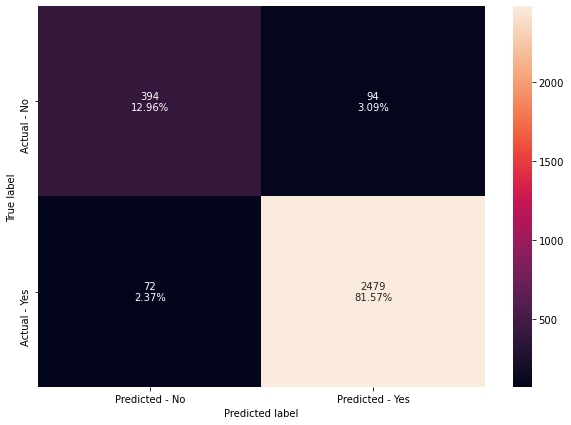

In [66]:
#Fitting the model
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train,y_train)

#Calculating different metrics
get_metrics_scoreDT(d_tree) # Note: using a modified get_metrics_scoreDT function

#Creating confusion matrix
make_confusion_matrix(d_tree,y_test)

Observation: 
Decision Tree is overfitting 

Random Forest

Accuracy on training set :  1.0
Accuracy on test set :  0.9529450477130635
Recall on training set :  1.0
Recall on test set :  0.9905919247353979
Precision on training set :  1.0
Precision on test set :  0.955026455026455


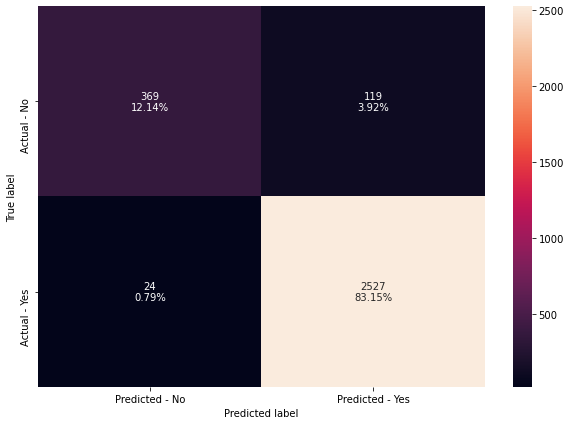

In [67]:
# build the model using the Random Forest Method from sklearn
rf_model = RandomForestClassifier(random_state=1)
rf_model.fit(X_train, y_train)

# get the metric values
get_metrics_scoreDT(rf_model) # Note: using a modified get_metrics_scoreDT function

# confustion matrix
make_confusion_matrix(rf_model,y_test)

Observation: Still overfitting, however the test score is very good 

Bagging

Accuracy on training set :  0.9970372460496614
Accuracy on test set :  0.9608423823626193
Recall on training set :  0.9979828542612204
Recall on test set :  0.9768718149745198
Precision on training set :  0.9984863773965691
Precision on test set :  0.9764890282131662


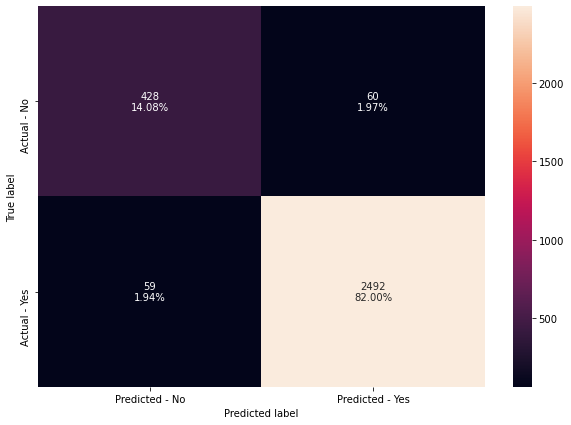

In [68]:
bagging_model = BaggingClassifier(random_state=1)
bagging_model.fit(X_train, y_train)

# metric getter
get_metrics_scoreDT(bagging_model) # Note: using a modified get_metrics_scoreDT function

# confusion matrix
make_confusion_matrix(bagging_model,y_test)

Observation: better, less overfitting

Gradient Boosting Classifier

Accuracy on training set :  0.9740406320541761
Accuracy on test set :  0.9684106614017769
Recall on training set :  0.9922676080013447
Recall on test set :  0.991375931007448
Precision on training set :  0.9771560999834464
Precision on test set :  0.9715712639262389


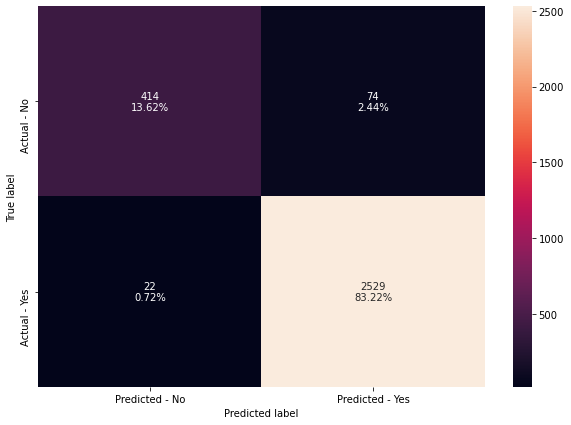

In [62]:
#Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

#Calculating different metrics
get_metrics_scoreDT(gb_classifier)

#Creating confusion matrix
make_confusion_matrix(gb_classifier,y_test)

AdaBoost Classifier

Accuracy on training set :  0.9600733634311512
Accuracy on test set :  0.9532741033234616
Recall on training set :  0.979660447133972
Recall on test set :  0.9792238337906704
Precision on training set :  0.9729549248747913
Precision on test set :  0.9655972168534983


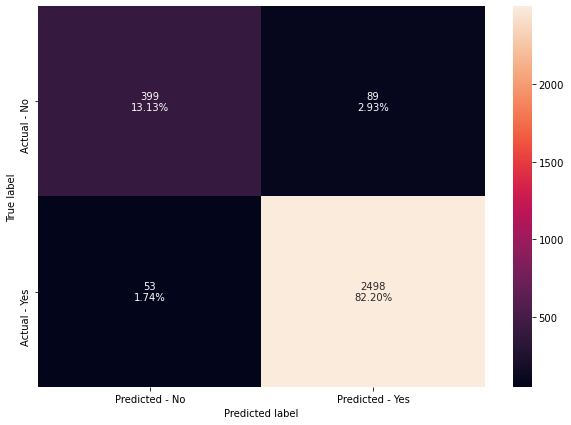

In [63]:
#Fitting the model
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

#Calculating different metrics
get_metrics_scoreDT(ab_classifier)

#Creating confusion matrix
make_confusion_matrix(ab_classifier,y_test)

Observations:
* ACTION

XGBoost Classifier

Accuracy on training set :  1.0
Accuracy on test set :  0.9713721618953604
Recall on training set :  1.0
Recall on test set :  0.9874558996471972
Precision on training set :  1.0
Precision on test set :  0.9786324786324786


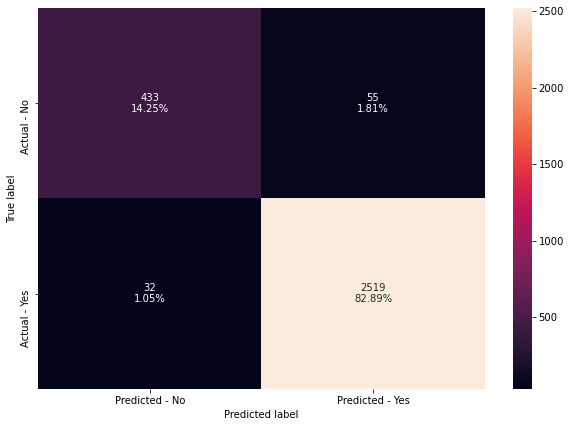

In [64]:
#Fitting the model
xgb_classifier = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_classifier.fit(X_train,y_train)

#Calculating different metrics
get_metrics_scoreDT(xgb_classifier)

#Creating confusion matrix
make_confusion_matrix(xgb_classifier,y_test)

In [74]:
# defining list of models
models = [d_tree, rf_model, bagging_model, ab_classifier, 
          gb_classifier, xgb_classifier]
# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []


# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_scoreDT(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])


In [75]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree','Random Forest',
                                          'Bagging Classifier', 'AdaBoost Classifier',
                                          'Gradient Boosting Classifier',
                                          'XGBoost Classifier'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test})

#Sorting models in decreasing order of test recall
comparison_frame.sort_values(by='Test_Recall',ascending=False)

Model  Train_Accuracy  Test_Accuracy  Train_Recall  \
4  Gradient Boosting Classifier        0.974041       0.968411      0.992268   
1                 Random Forest        1.000000       0.952945      1.000000   
5            XGBoost Classifier        1.000000       0.971372      1.000000   
3           AdaBoost Classifier        0.960073       0.953274      0.979660   
2            Bagging Classifier        0.997037       0.960842      0.997983   
0                 Decision Tree        1.000000       0.945377      1.000000   

   Test_Recall  Train_Precision  Test_Precision  
4     0.991376         0.977156        0.971571  
1     0.990592         1.000000        0.955026  
5     0.987456         1.000000        0.978632  
3     0.979224         0.972955        0.965597  
2     0.976872         0.998486        0.976489  
0     0.971776         1.000000        0.963467

TUNING - Per course instructions: tune the top 3 (minus XGBoost due to time constraints)

In [83]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline, make_pipeline


Gradient Boosting Hyperparameter Tuning

In [76]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train_over, y_train_over)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.8, n_estimators=250, random_state=1,
                           subsample=1)

Accuracy on training set :  0.9853273137697517
Accuracy on test set :  0.9697268838433696
Recall on training set :  0.9914271306101866
Recall on test set :  0.9843198745589965
Precision on training set :  0.9910939337926399
Precision on test set :  0.979711275848615


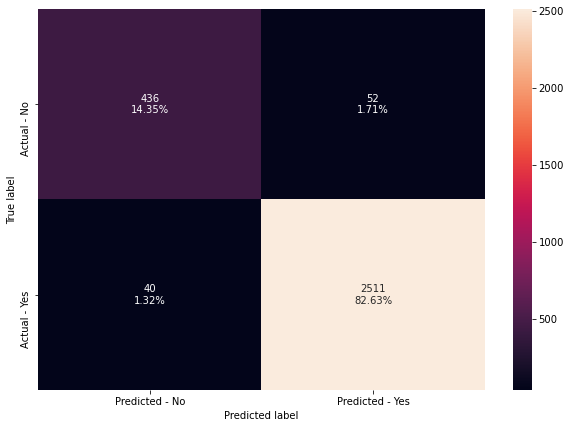

In [77]:
#Calculating different metrics
get_metrics_scoreDT(gbc_tuned)

#Creating confusion matrix
make_confusion_matrix(gbc_tuned,y_test)

Tuning Decision Tree
* NOTE: Using Oversampling dataset, due to original giving a 1.0 on the Recall 
* Very good - 99/98 recall

Observation: 
* Initial run: predict/test both had perfect 1.0 scores - Suspect Data Leakage
* Will need to go back and double check the df splitting is done properly - DONE

Tuned Random Forest

In [97]:
# Choose the type of classifier. 
rf_tuned = RandomForestClassifier(class_weight={0:0.35,1:0.65},random_state=1)

parameters = {  
                'max_depth': list(np.arange(3,10,1)),
                'max_features': np.arange(0.6,1.1,0.1),
                'max_samples': np.arange(0.7,1.1,0.1),
                'min_samples_split': np.arange(2, 20, 5),
                'n_estimators': np.arange(30,160,20),
                'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer,cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train_over, y_train_over)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train_over, y_train_over)

RandomForestClassifier(class_weight={0: 0.35, 1: 0.65}, max_depth=9,
                       max_features=0.6, max_samples=0.9999999999999999,
                       min_impurity_decrease=0.0001, min_samples_split=12,
                       n_estimators=90, random_state=1)

Accuracy on training set :  0.9343961625282167
Accuracy on test set :  0.935176044751563
Recall on training set :  0.9611699445284921
Recall on test set :  0.9670717365738926
Precision on training set :  0.9606854838709677
Precision on test set :  0.9562015503875969


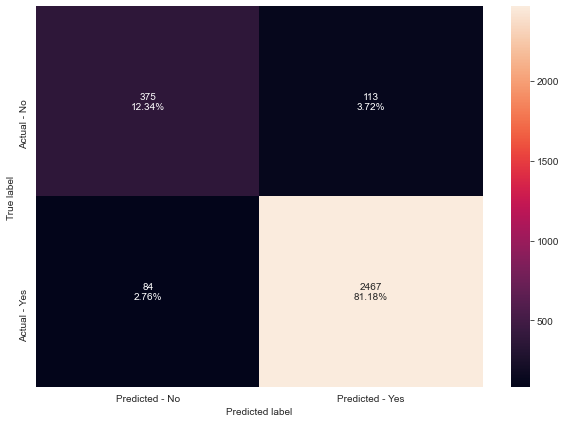

In [145]:
#Calculating different metrics
get_metrics_scoreDT(rf_tuned)

#Creating confusion matrix
make_confusion_matrix(rf_tuned,y_test)

Observations:
* Very good results
* Both recall values are high (~96%) and very similar in value

Tuning Bagging Classifier

In [100]:
# Choose the type of classifier. 
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train_over, y_train_over)

BaggingClassifier(max_features=0.7, max_samples=1, random_state=1)

Accuracy on training set :  0.1606941309255079
Accuracy on test set :  0.16057913787430075
Recall on training set :  0.0
Recall on test set :  0.0
Precision on training set :  0.0
Precision on test set :  0.0


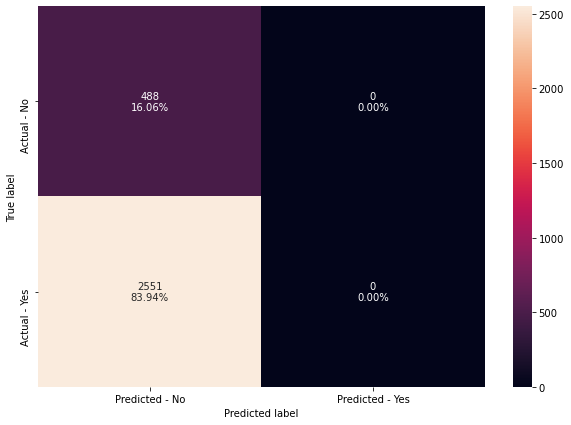

In [101]:
get_metrics_scoreDT(bagging_estimator_tuned)

#Creating confusion matrix
make_confusion_matrix(bagging_estimator_tuned,y_test)

Observations:
* ACTION

Tuning AdaBoost

In [79]:
pipe_ada = Pipeline([('scl', StandardScaler()), ('pca', PCA(n_components=2)), ('ada', AdaBoostClassifier(random_state=1))])
pipe_ada.fit(X_train_over, y_train_over)
print('Test Accuracy: %.3f' % pipe_ada.score(X_test, y_test))

Test Accuracy: 0.821


In [ ]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),
                      DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter  combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

Accuracy on training set :  0.813910835214447
Accuracy on test set :  0.8209937479434024
Recall on training set :  0.8292149941166582
Recall on test set :  0.839670717365739
Precision on training set :  0.942131398013751
Precision on test set :  0.9407114624505929


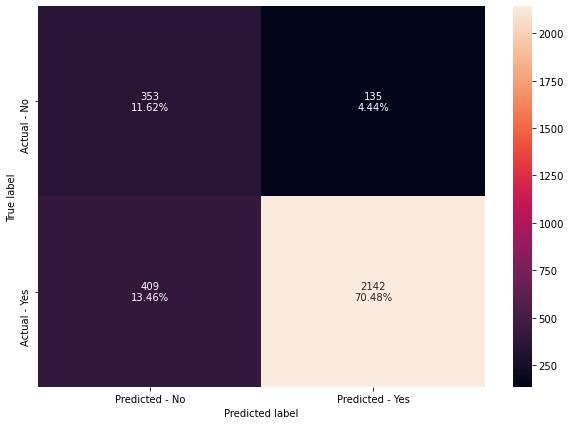

In [80]:
#Calculating different metrics
get_metrics_scoreDT(pipe_ada)

#Creating confusion matrix
make_confusion_matrix(pipe_ada,y_test)

Observations:
* Not as good on the Recall - but doesn't appear to be overfitting

TUNING with Random Search

In [81]:
from sklearn.model_selection import RandomizedSearchCV

XGBoost Tuning with RandomizedSearchCV

In [92]:
%%time 

#Creating pipeline
pipe=make_pipeline(StandardScaler(),XGBClassifier(random_state=1,eval_metric='logloss', n_estimators = 50, n_jobs=-1))

#Parameter grid to pass in RandomizedSearchCV
param_grid={'xgbclassifier__n_estimators':np.arange(50,300,50),
            'xgbclassifier__scale_pos_weight':[0,1,2,5,10],
            'xgbclassifier__learning_rate':[0.01,0.1,0.2,0.05],
            'xgbclassifier__gamma':[0,1,3,5],
            'xgbclassifier__subsample':[0.7,0.8,0.9,1],
           'xgbclassifier__max_depth':np.arange(1,10,1),
            'xgbclassifier__reg_lambda':[0,1,2,5,10]}





# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'xgbclassifier__subsample': 1, 'xgbclassifier__scale_pos_weight': 5, 'xgbclassifier__reg_lambda': 0, 'xgbclassifier__n_estimators': 50, 'xgbclassifier__max_depth': 1, 'xgbclassifier__learning_rate': 0.01, 'xgbclassifier__gamma': 0} with CV score=1.0:
CPU times: user 21min 45s, sys: 1min 57s, total: 23min 43s
Wall time: 3min 33s


In [93]:
# Creating new pipeline with best parameters
xgb_tuned2 = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        (
            "XGB",
            XGBClassifier(
                random_state=1,
                n_estimators=50,
                scale_pos_weight=5,
                gamma=1,
                subsample=0.9,
                learning_rate= 0.01,
                eval_metric='logloss', max_depth = 2, reg_lambda = 0
            ),
        ),
    ]
)
# Fit the model on training data
xgb_tuned2.fit(X_train_over, y_train_over)

Pipeline(steps=[('scaler', StandardScaler()),
                ('XGB',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, eval_metric='logloss',
                               gamma=1, gpu_id=-1, importance_type='gain',
                               interaction_constraints='', learning_rate=0.01,
                               max_delta_step=0, max_depth=2,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=50,
                               n_jobs=8, num_parallel_tree=1, random_state=1,
                               reg_alpha=0, reg_lambda=0, scale_pos_weight=5,
                               subsample=0.9, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

Accuracy on training set :  0.8742945823927766
Accuracy on test set :  0.8805528134254689
Recall on training set :  0.993108085392503
Recall on test set :  0.9945119560956488
Precision on training set :  0.8742231429416987
Precision on test set :  0.8790713790713791


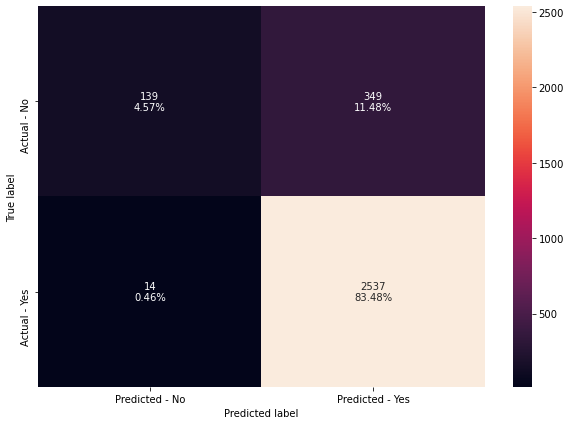

In [95]:
# Calculating different metrics
get_metrics_scoreDT(xgb_tuned2)

# Creating confusion matrix
make_confusion_matrix(xgb_tuned2, y_test)

Very high recall - Great model! 

Tuning Adaboost with RandomizedSearchCV

In [87]:
%%time

# Creating pipeline
pipe = make_pipeline(StandardScaler(), AdaBoostClassifier(random_state=1))

# Parameter grid to pass in RandomizedSearchCV
param_grid = {
    "adaboostclassifier__n_estimators": np.arange(10, 110, 10),
    "adaboostclassifier__learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "adaboostclassifier__base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
abc_tuned2 = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
abc_tuned2.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(abc_tuned2.best_params_,abc_tuned2.best_score_))

Best parameters are {'adaboostclassifier__n_estimators': 90, 'adaboostclassifier__learning_rate': 0.2, 'adaboostclassifier__base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.9820129902255268:
CPU times: user 3min 13s, sys: 383 ms, total: 3min 13s
Wall time: 3min 13s


In [88]:
# Creating new pipeline with best parameters
abc_tuned2 = make_pipeline(
    StandardScaler(),
    AdaBoostClassifier(
        base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
        n_estimators=90,
        learning_rate=0.2,
        random_state=1,
    ),
)

# Fit the model on training data
abc_tuned2.fit(X_train_over, y_train_over)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('adaboostclassifier',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                                          random_state=1),
                                    learning_rate=0.2, n_estimators=90,
                                    random_state=1))])

Accuracy on training set :  0.9867381489841986
Accuracy on test set :  0.9697268838433696
Recall on training set :  0.9917633215666498
Recall on test set :  0.9839278714229713
Precision on training set :  0.992430613961312
Precision on test set :  0.9800859039437719


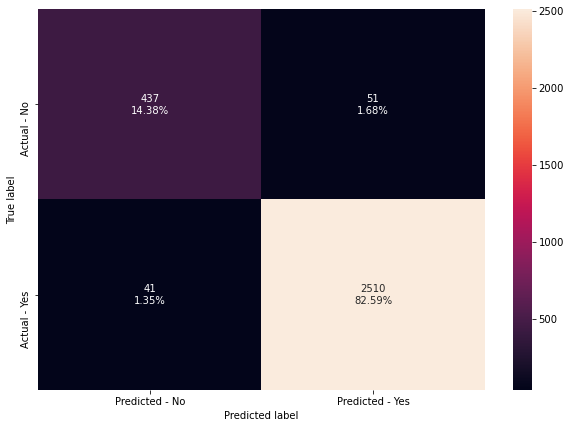

In [90]:
# Calculating different metrics
get_metrics_scoreDT(abc_tuned2)

# Creating confusion matrix
make_confusion_matrix(abc_tuned2, y_test)

Very good Recall! 

Compare all models

In [102]:
# defining list of models
models = [d_tree, rf_model, bagging_model, ab_classifier, 
          gb_classifier, xgb_classifier, gbc_tuned, rf_tuned, bagging_estimator_tuned, pipe_ada, abc_tuned2,xgb_tuned2]
# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []


# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_scoreDT(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])


In [103]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree','Random Forest',
                                          'Bagging Classifier',
                                          'Gradient Boosting Classifier','AdaBoost Classifier',
                                          'XGBoost Classifier', 'Tuned Gradient Boost', 'Tuned Random Forest',
                                         'Tuned Bagging Estimator', 'Pipe AdaBoost', 'Tuned Adaboost', 'Tuned XGBoost'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test})

#Sorting models in decreasing order of test recall
comparison_frame.sort_values(by='Test_Recall',ascending=False)

Model  Train_Accuracy  Test_Accuracy  Train_Recall  \
11                 Tuned XGBoost        0.874295       0.880553      0.993108   
4            AdaBoost Classifier        0.974041       0.968411      0.992268   
1                  Random Forest        1.000000       0.952945      1.000000   
5             XGBoost Classifier        1.000000       0.971372      1.000000   
6           Tuned Gradient Boost        0.985327       0.969727      0.991427   
10                Tuned Adaboost        0.986738       0.969727      0.991763   
7            Tuned Random Forest        0.976580       0.961830      0.983695   
3   Gradient Boosting Classifier        0.960073       0.953274      0.979660   
2             Bagging Classifier        0.997037       0.960842      0.997983   
0                  Decision Tree        1.000000       0.945377      1.000000   
9                  Pipe AdaBoost        0.813911       0.820994      0.829215   
8        Tuned Bagging Estimator        0.160694       0.160579      0.000000   

    Test_Recall  Train_Precision  Test_Precision  
11     0.994512         0.874223        0.879071  
4      0.991376         0.977156        0.971571  
1      0.990592         1.000000        0.955026  
5      0.987456         1.000000        0.978632  
6      0.984320         0.991094        0.979711  
10     0.983928         0.992431        0.980086  
7      0.980008         0.988347        0.974659  
3      0.979224         0.972955        0.965597  
2      0.976872         0.998486        0.976489  
0      0.971776         1.000000        0.963467  
9      0.839671         0.942131        0.940711  
8      0.000000         0.000000        0.000000